In [1]:
# Install libraries/packages
!pip install pandas
!pip install monai
!pip install np
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install sklearn
!pip install scikit-learn
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached monai-1.3.2-py3-none-any.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 3.7 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 3.7 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.4 MB/s eta 0:00:000

In [11]:
# Import libraries/packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()

In [22]:
df = pd.read_csv("/project/data/textClassification/cancer patient data sets.csv", index_col='index')

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Remove duplicate entries
df=df.drop_duplicates()

display(df)

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
497     35       1              2            1             2   
977     45       1              3            1             4   
979     53       1              3            1             4   
983     26       1              3            2             4   
984     37       1              1            2             3   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
497                       1             2                     1   
977                       3             2                     3   
979                       2             3                     2   
983                       2             3                     2   
984                       4             2                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath  \
index                          ...                                              
0                  2        4  ...        3            4                    2   
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
497                2        3  ...        3            4                    5   
977                4        3  ...        3            2                    2   
979                3        3  ...        2            2                    3   
983                3        3  ...        4            5                    6   
984                3        3  ...        4            1                    2   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
497           1                      3                         2   
977           4                      2                         2   
979           4                      1                         5   
983           5                      5                         4   
984           4                      6                         5   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [52]:
print('Cancer Levels: ', df['level'].unique())

# Low to High level of Lung Cancer [1-3]
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df.replace({"level": mapping}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  [1 2 0]
Cancer Levels:  [1 2 0]


In [5]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

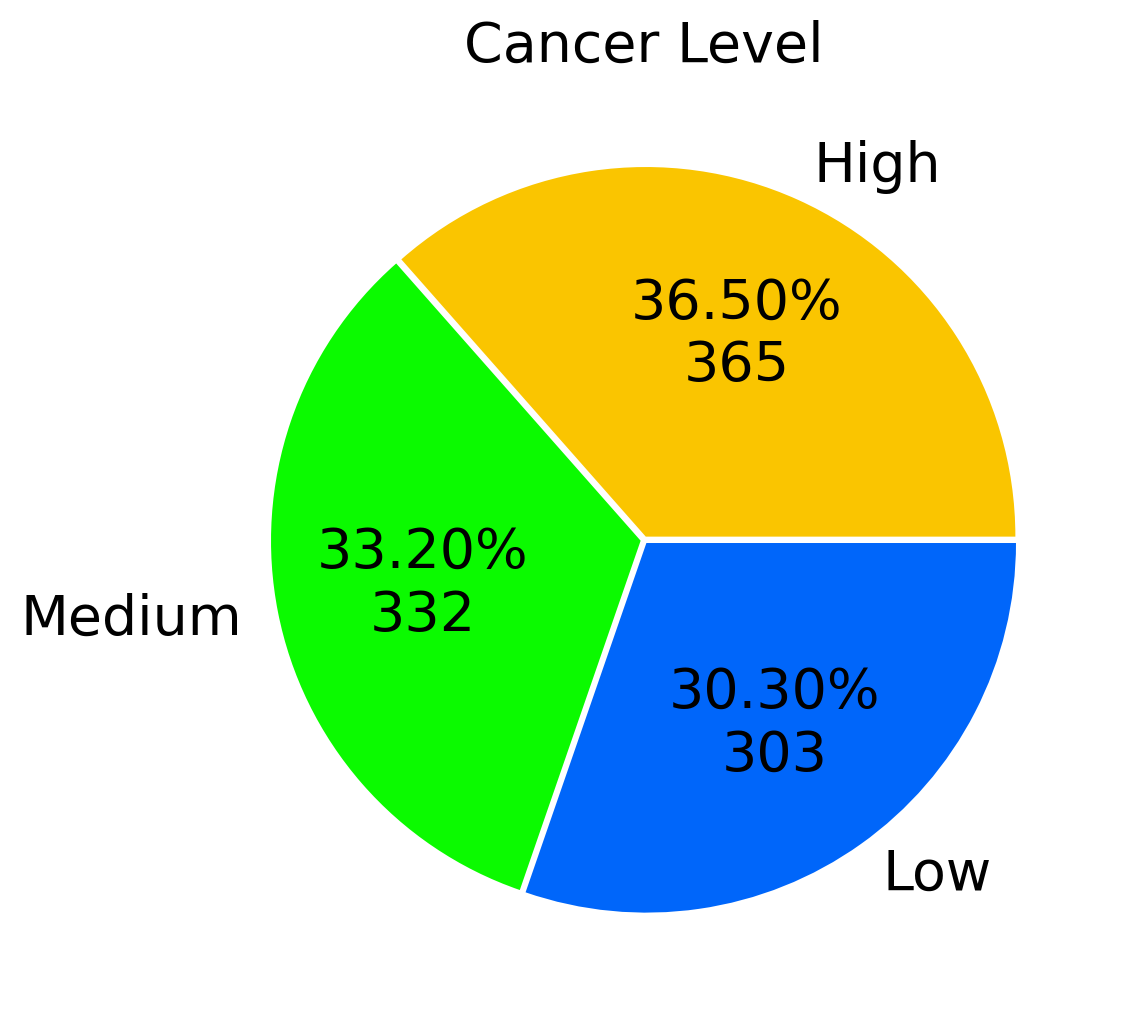

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Cancer Level', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

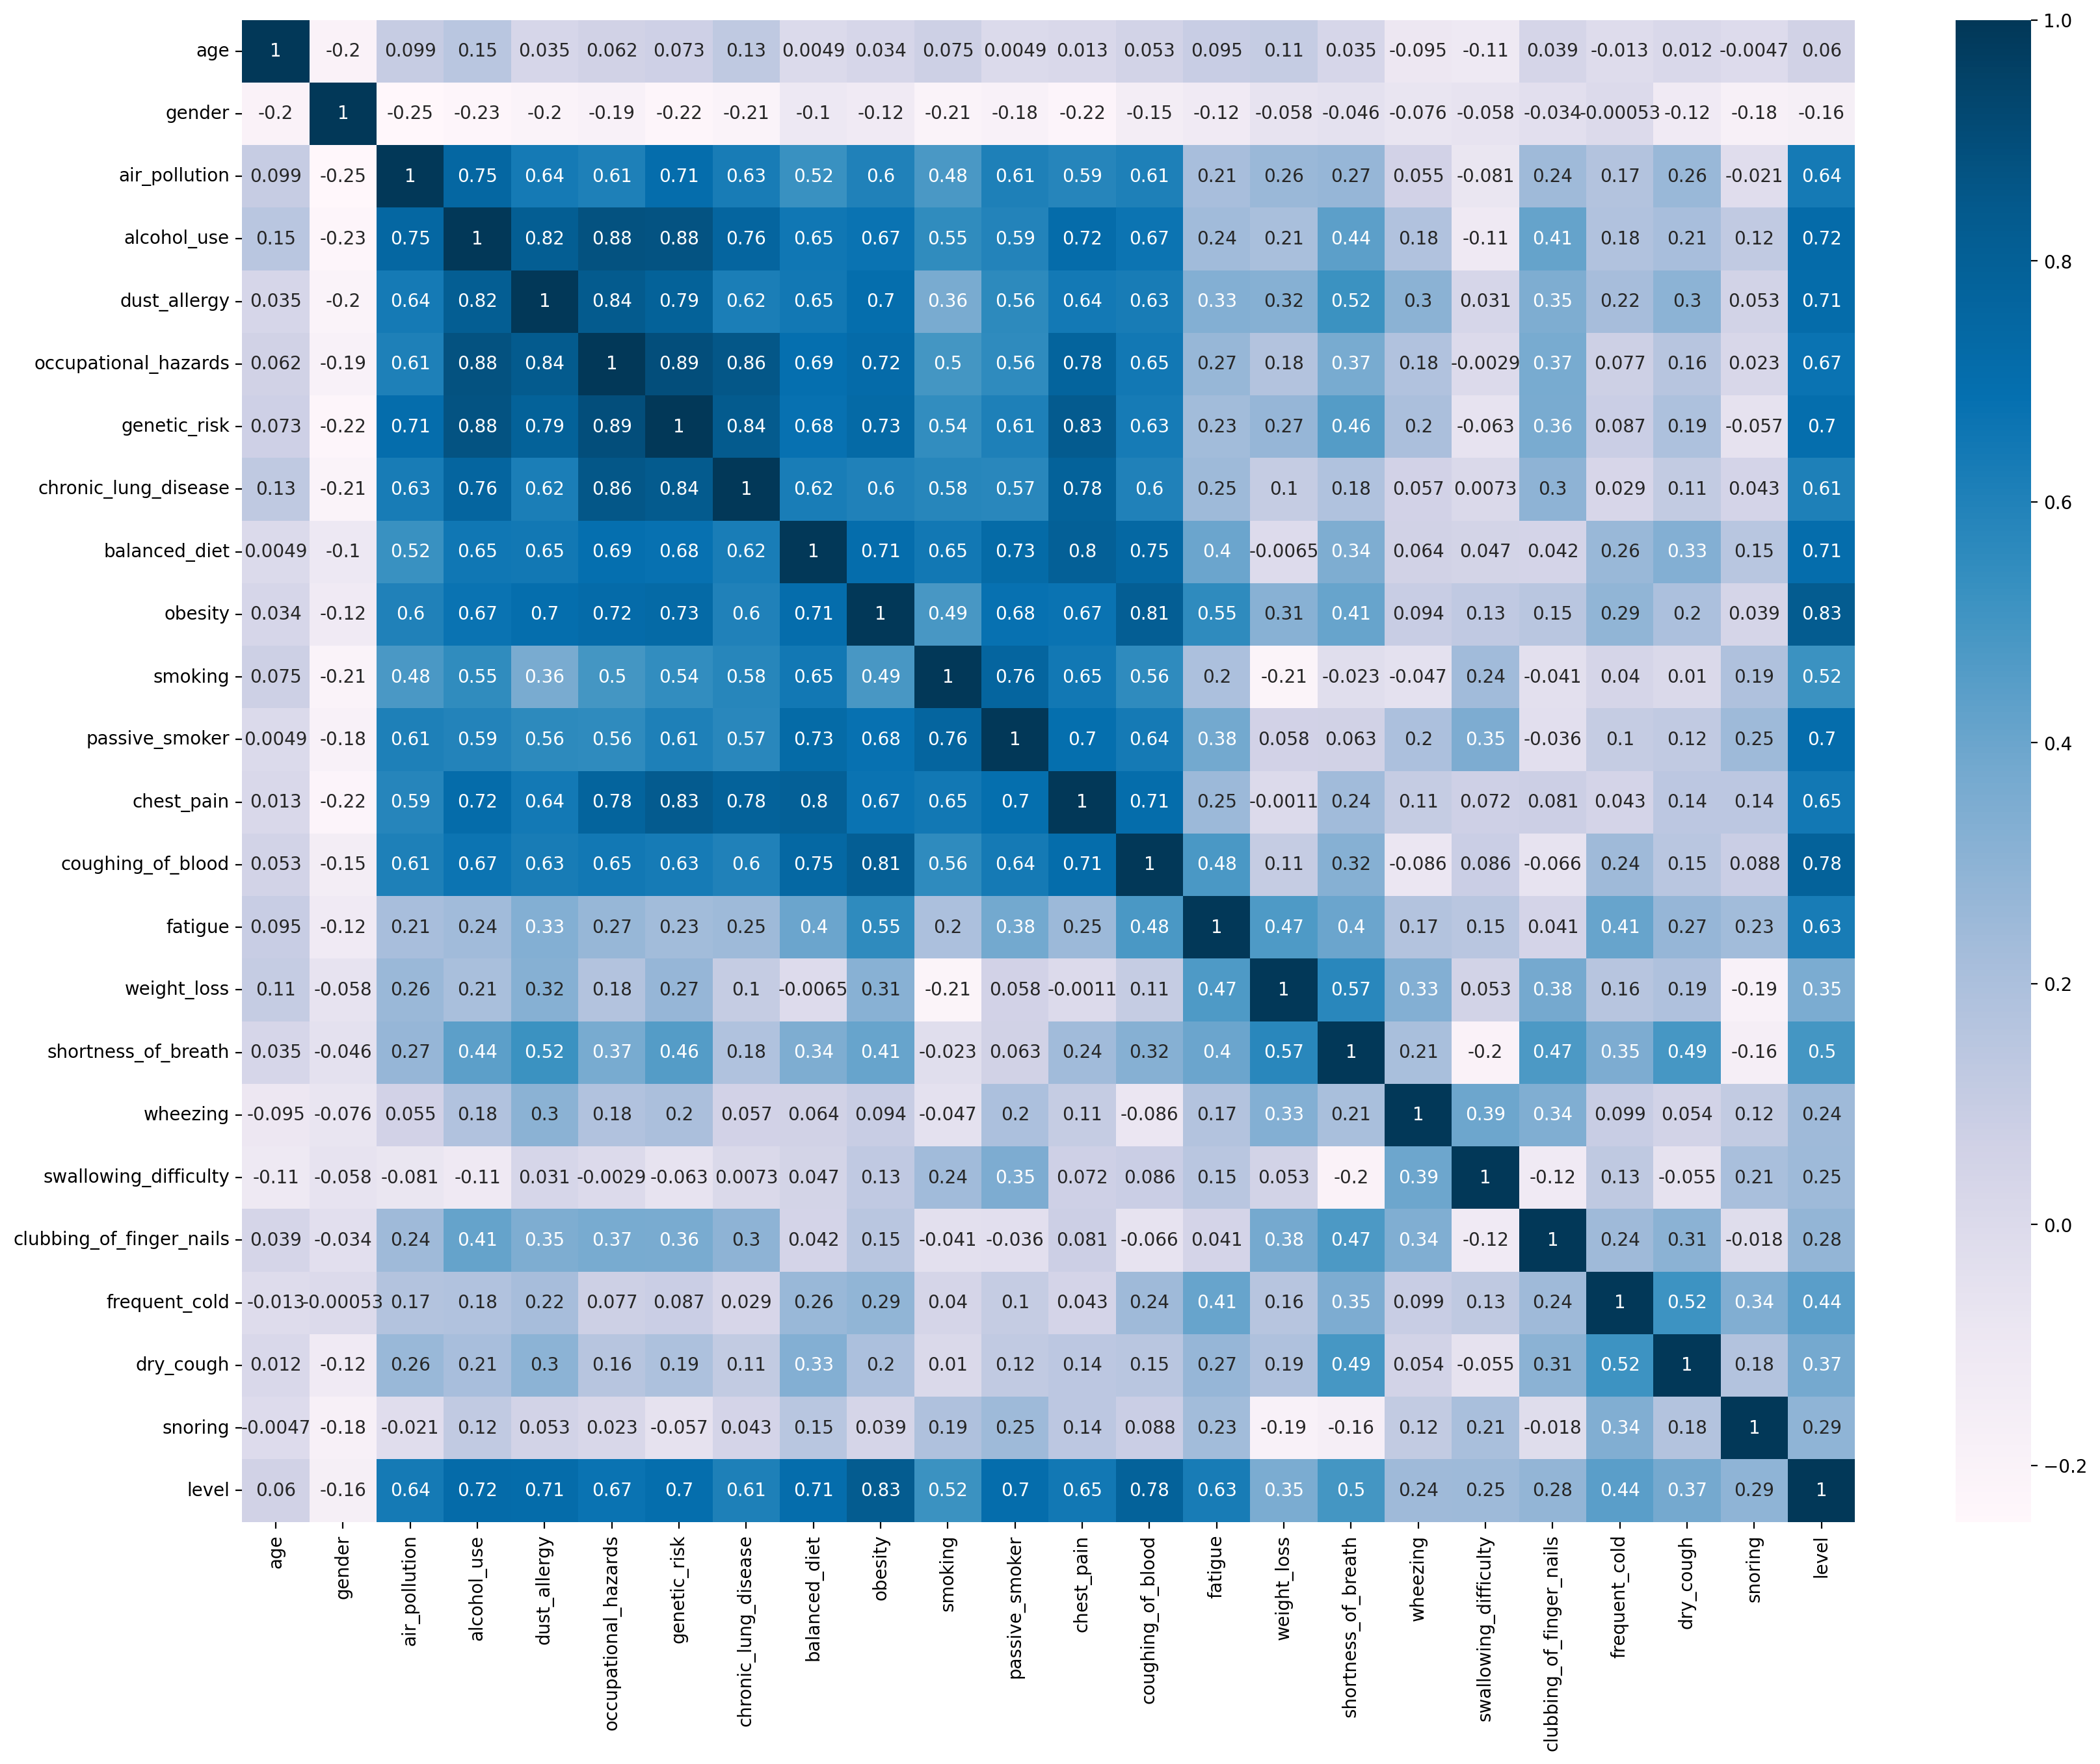

In [7]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [15]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
index                          ...                                            
0                  2        4  ...                  4        3            4   
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty  \
index                                                         
0                        2         2                      3   
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

index
0       Low
1    Medium
2      High
3      High
4      High
Name: level, dtype: object


/home/workbench/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

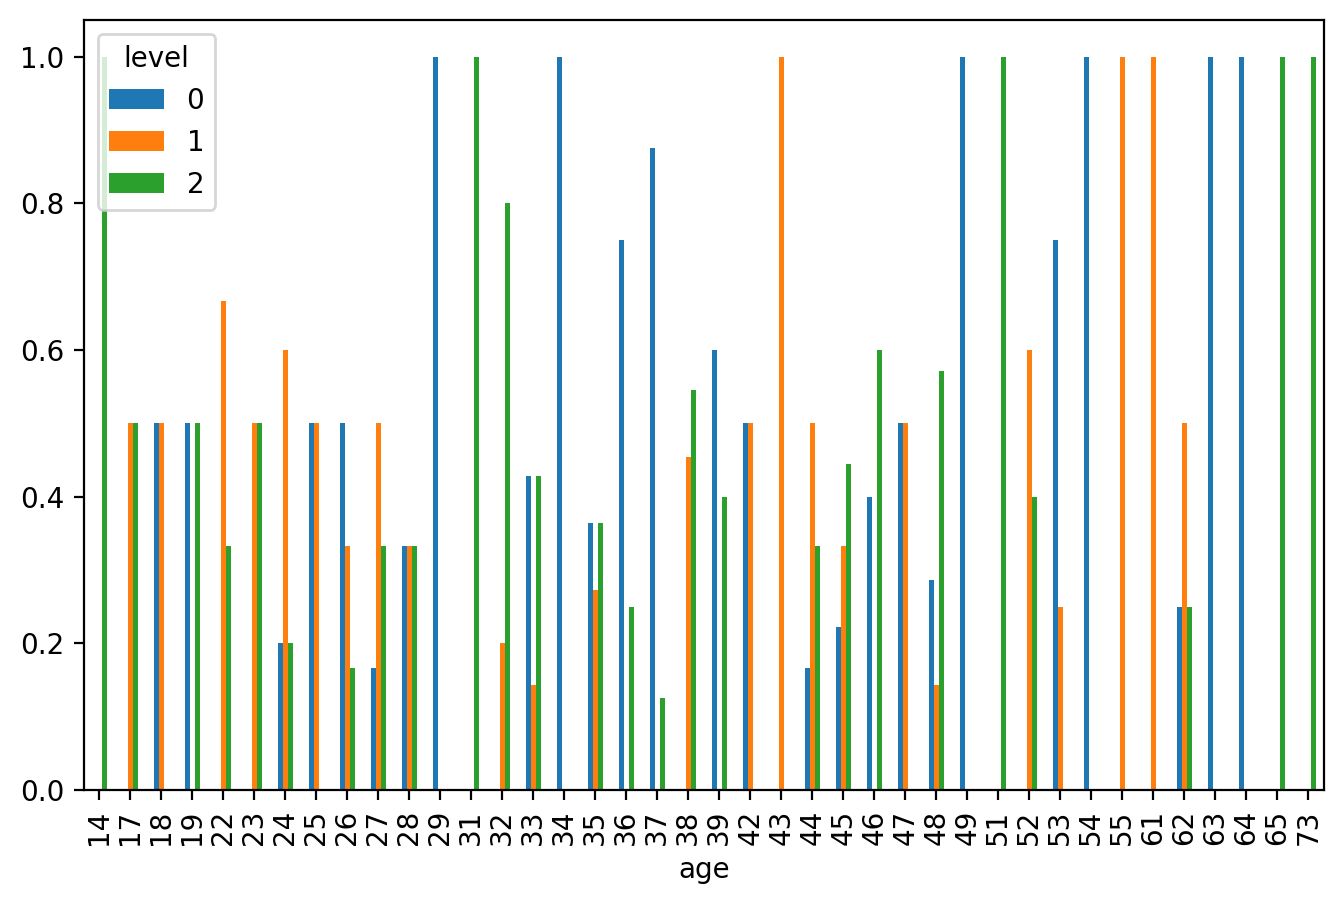

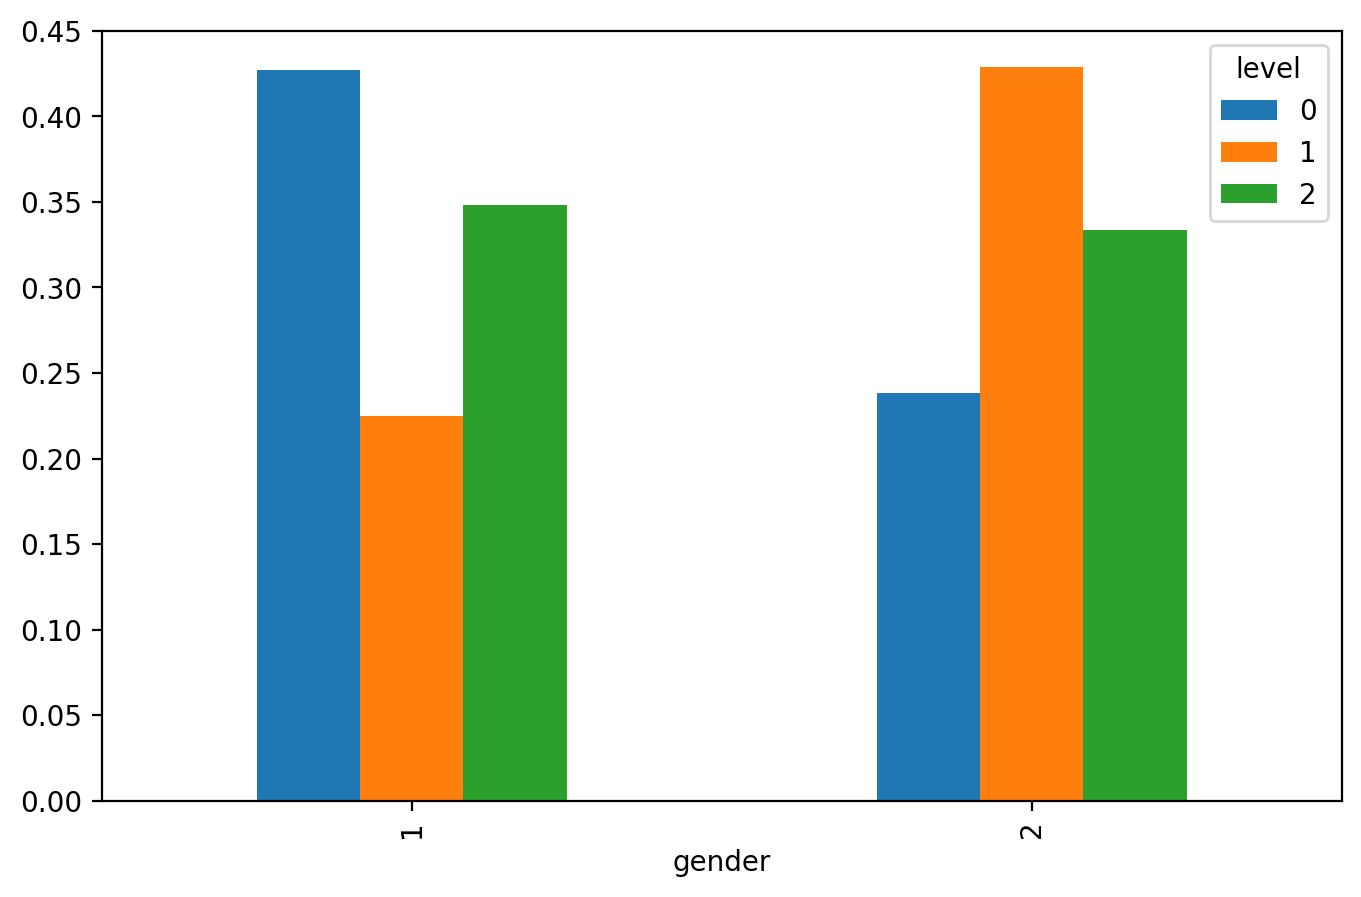

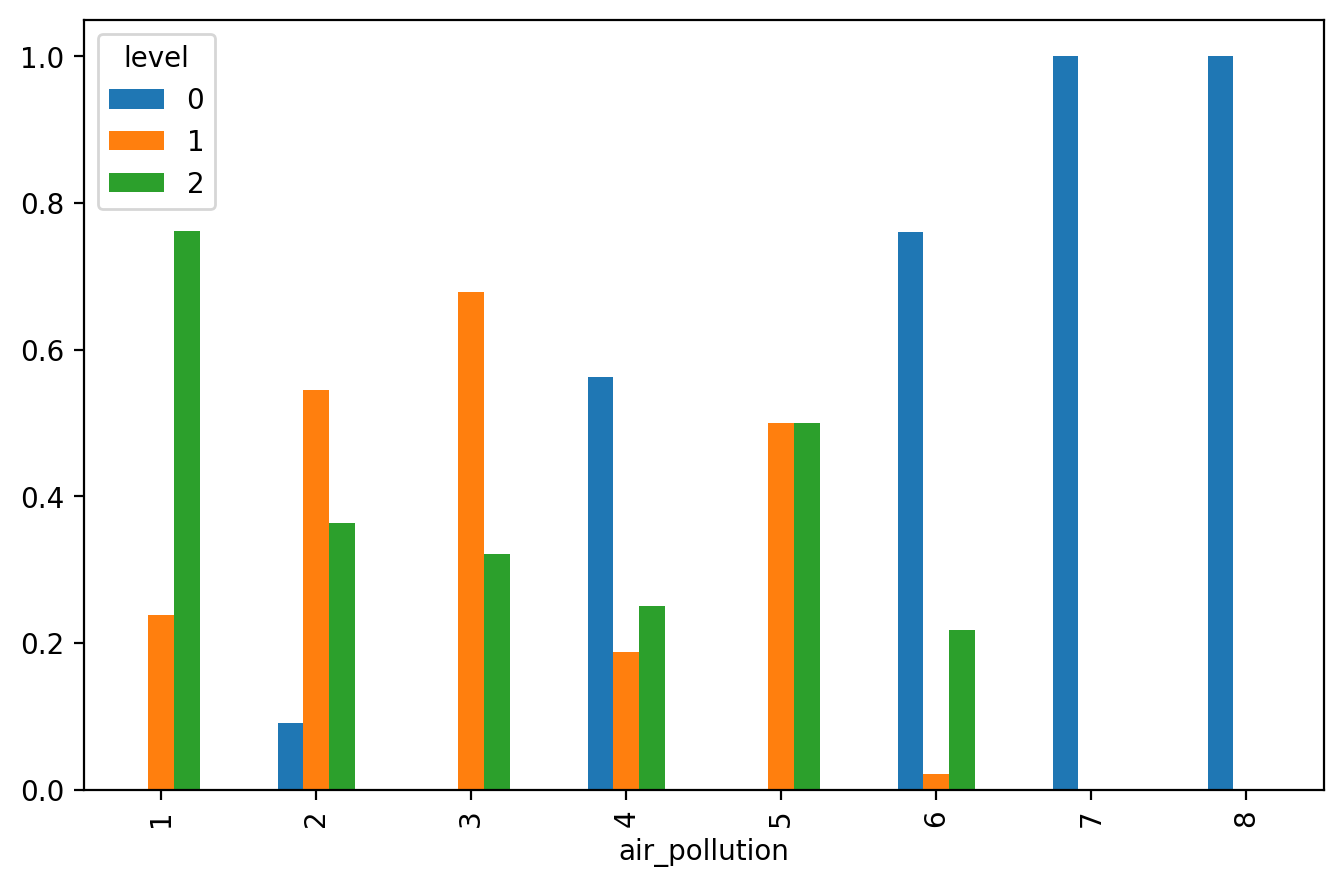

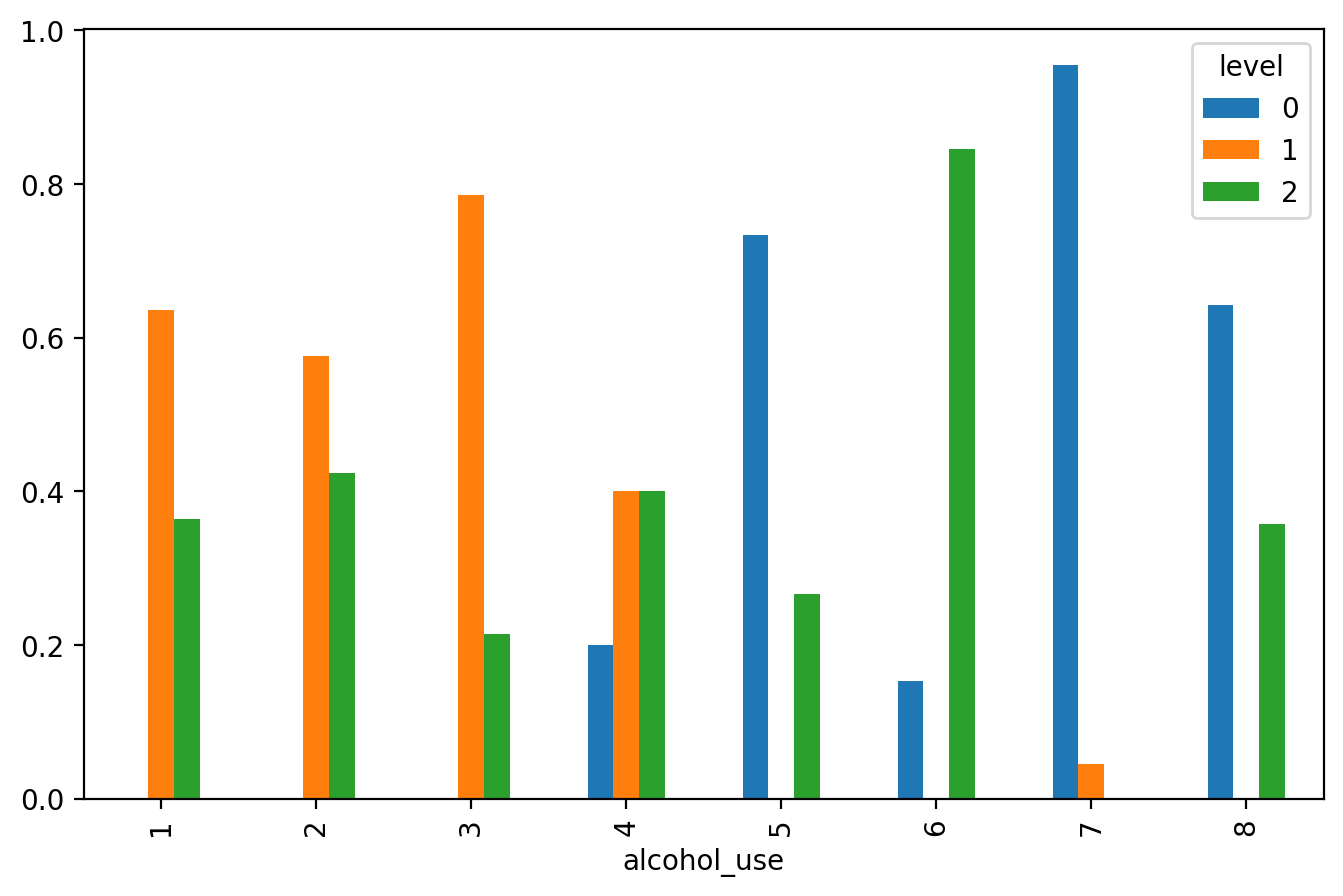

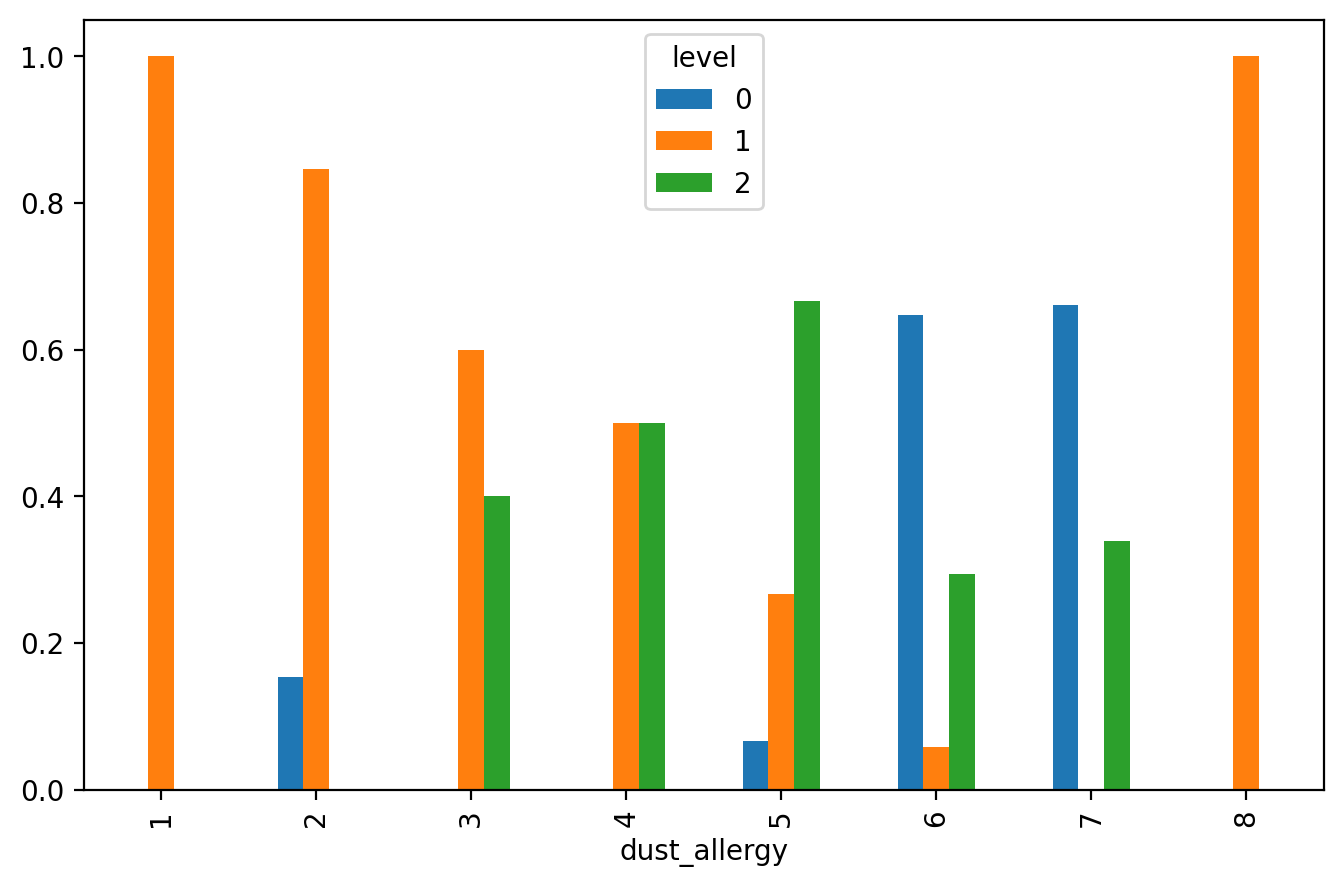

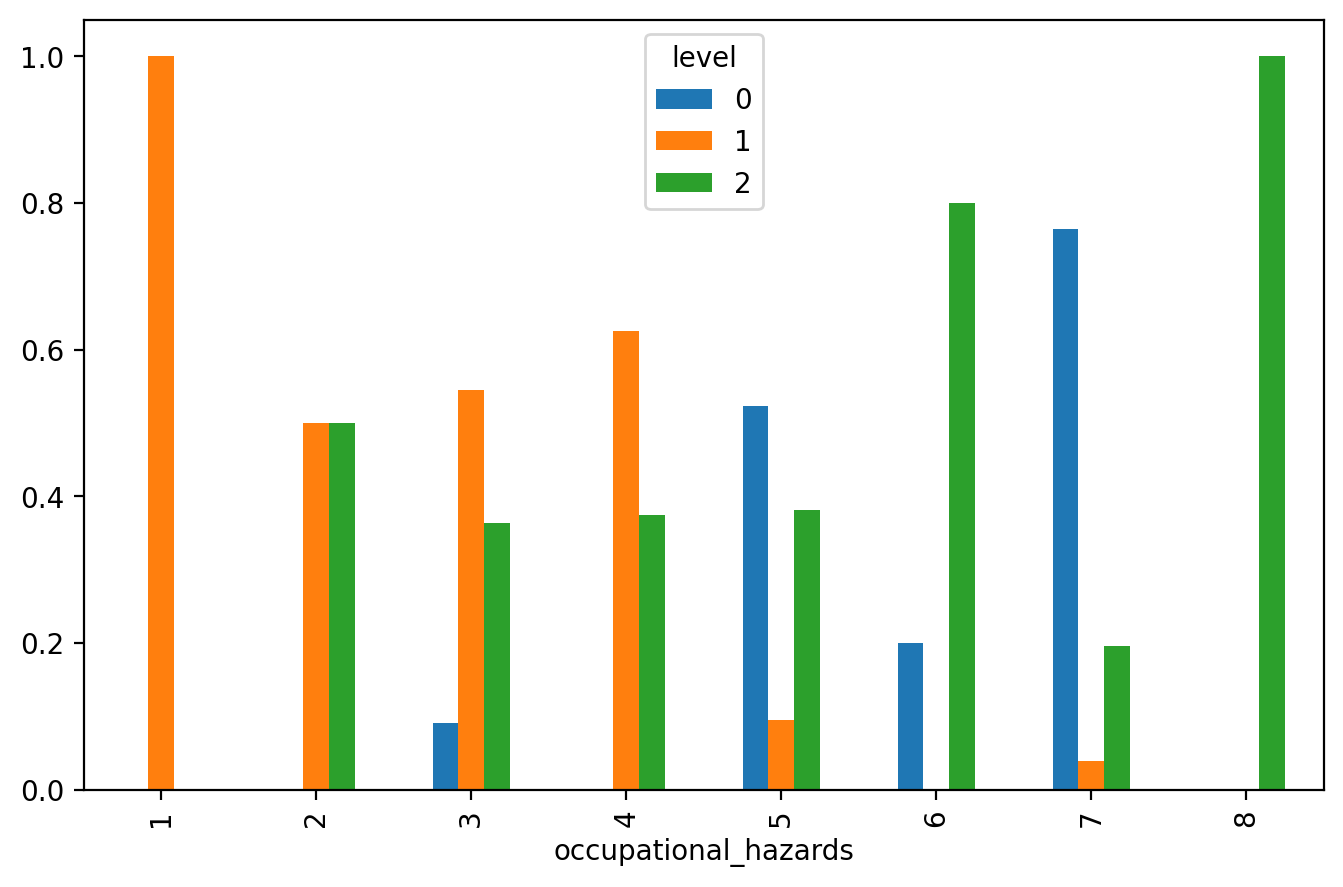

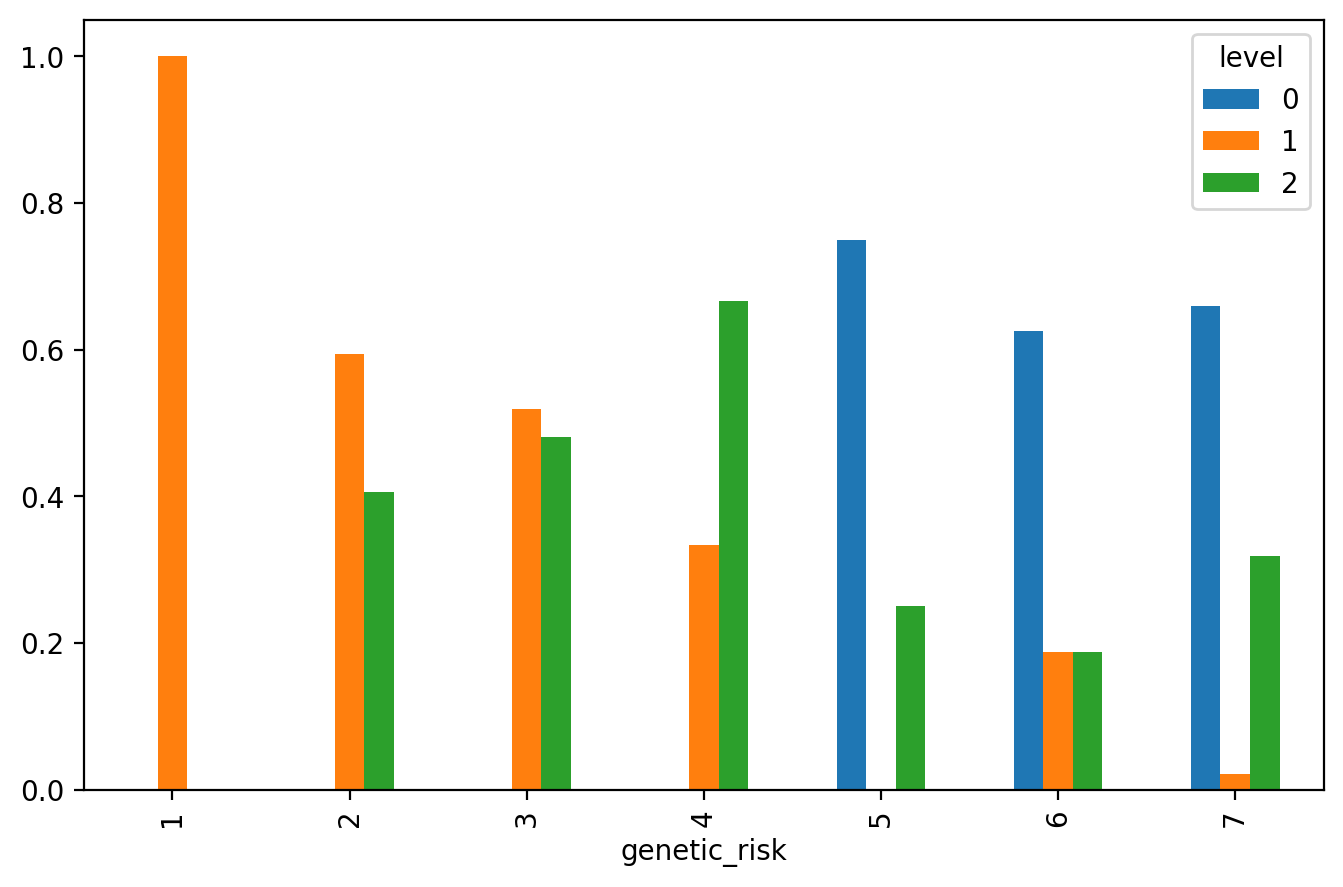

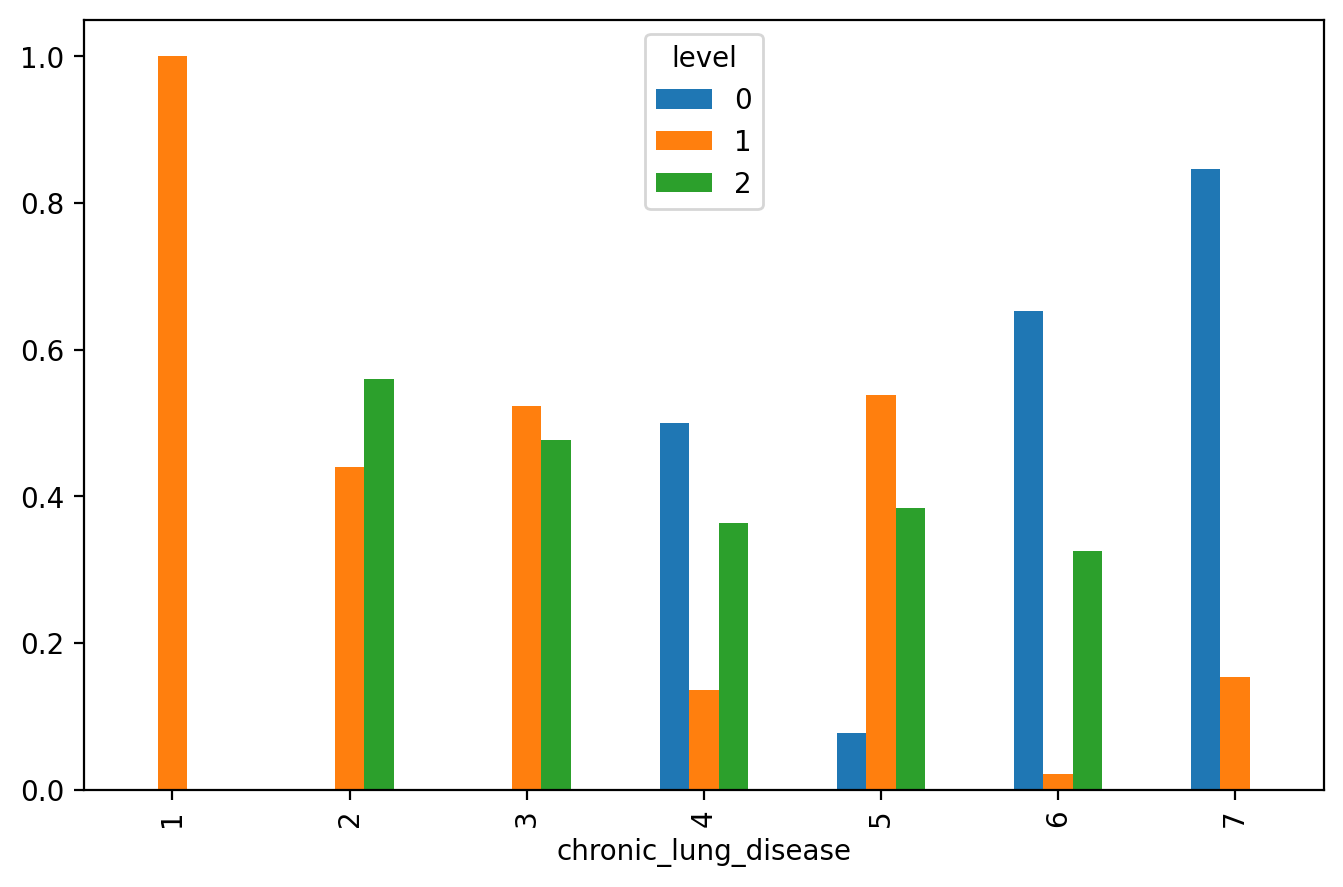

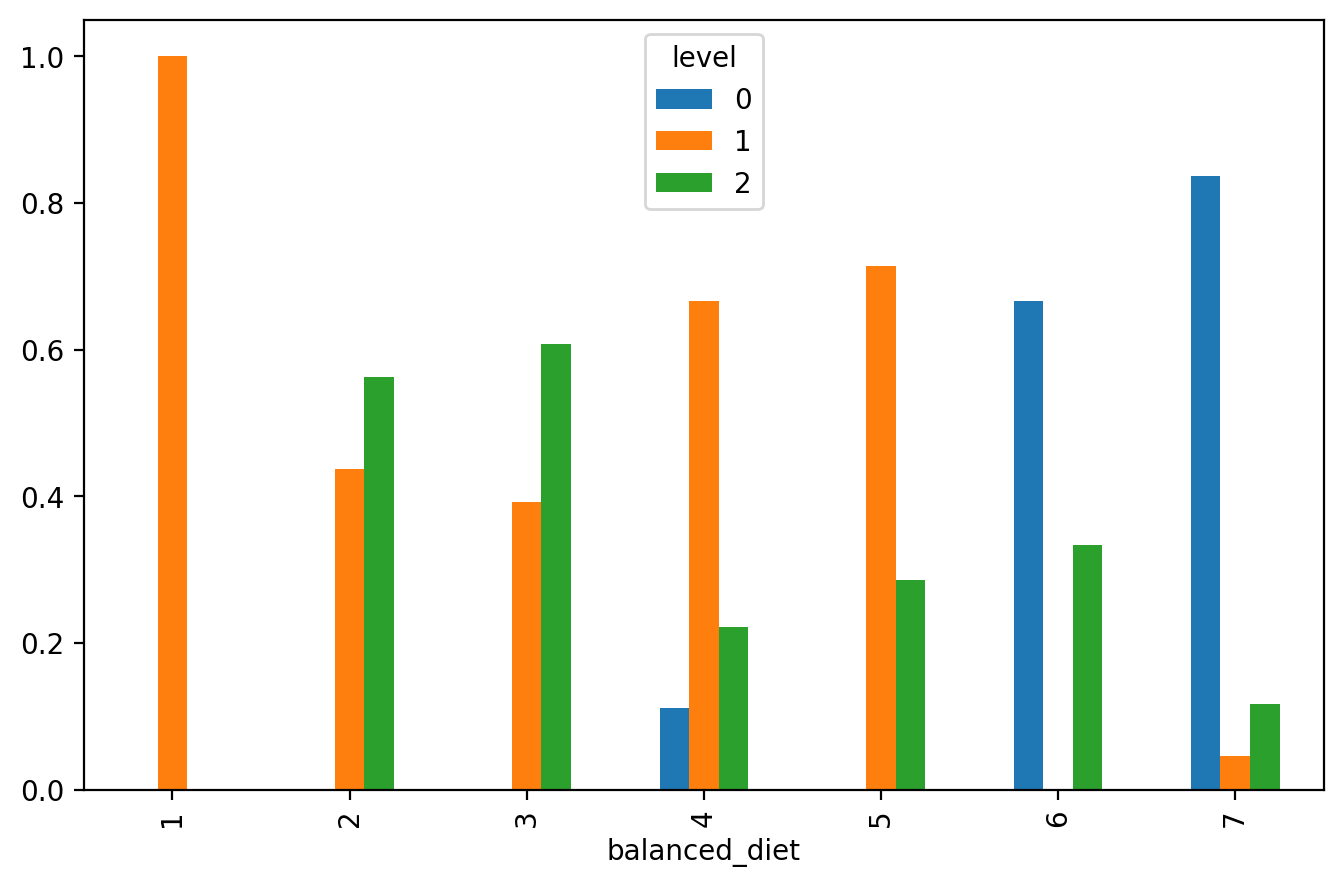

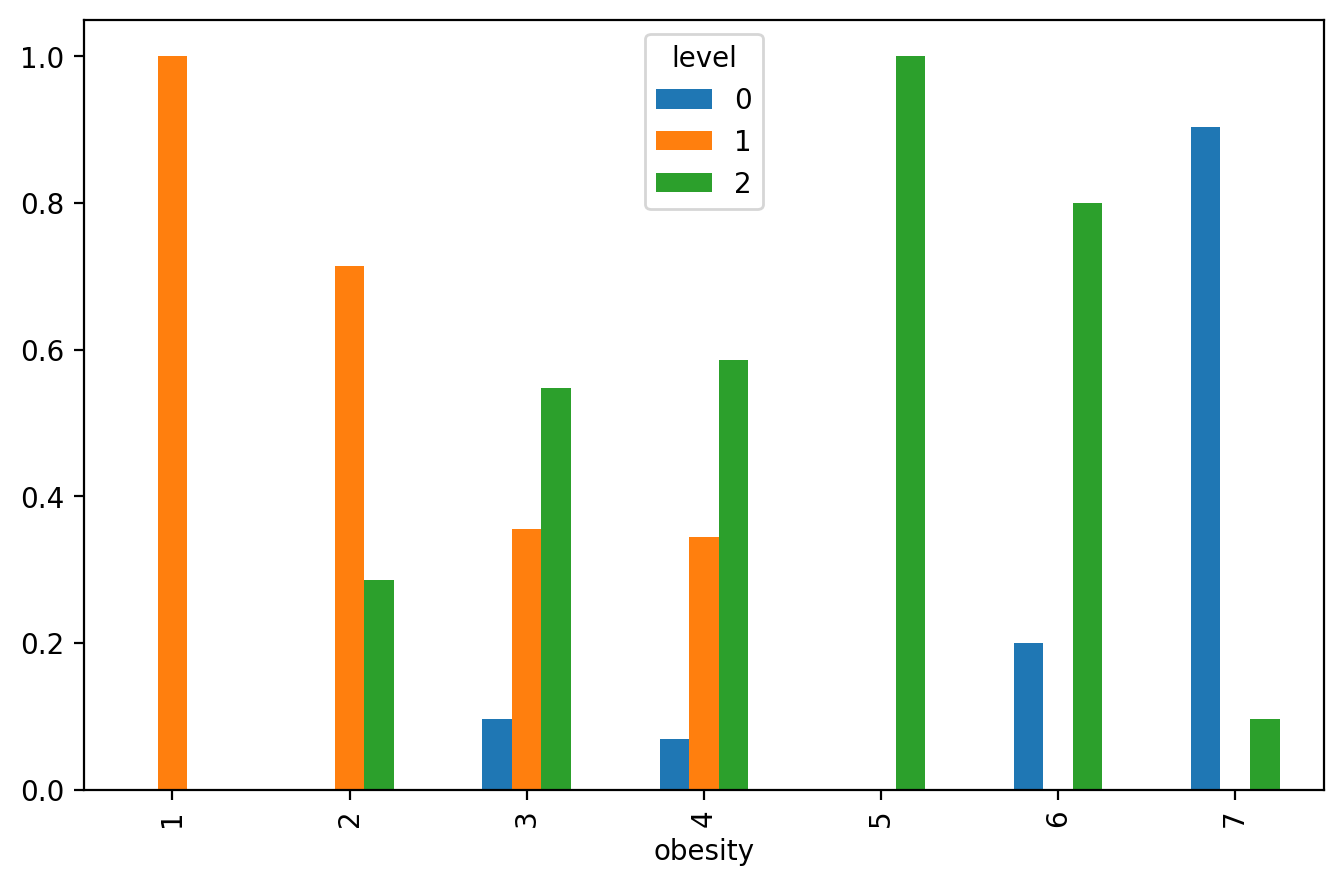

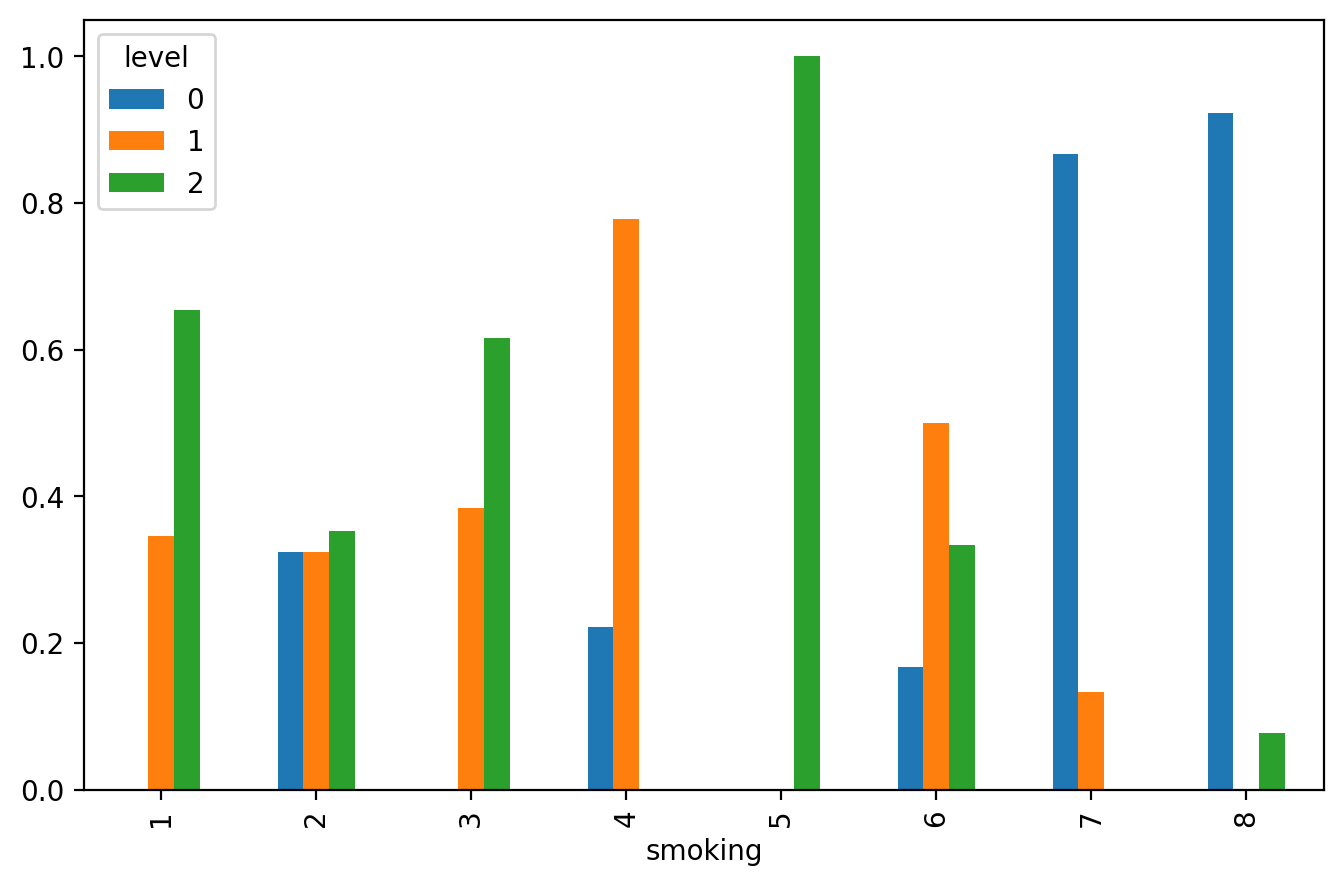

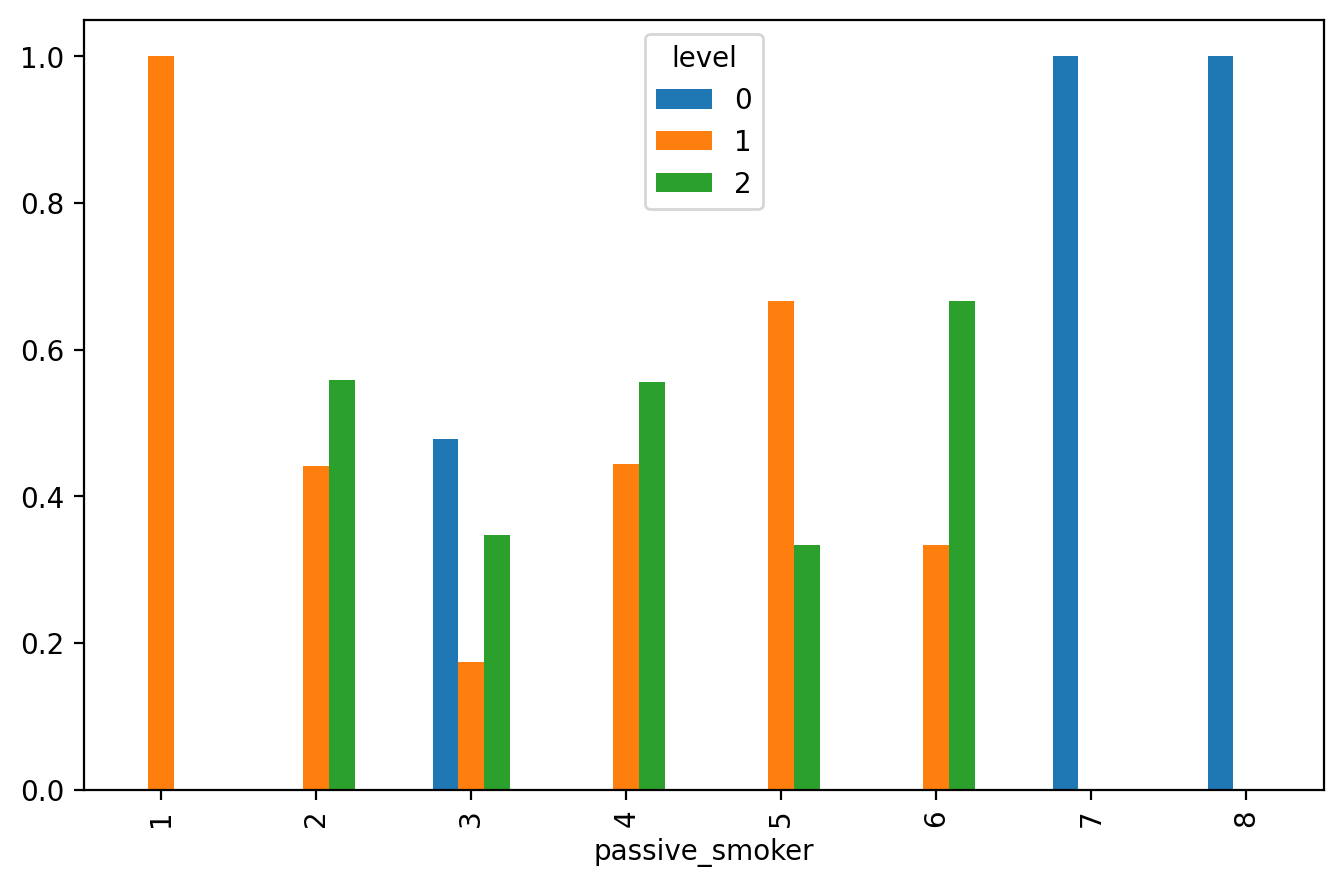

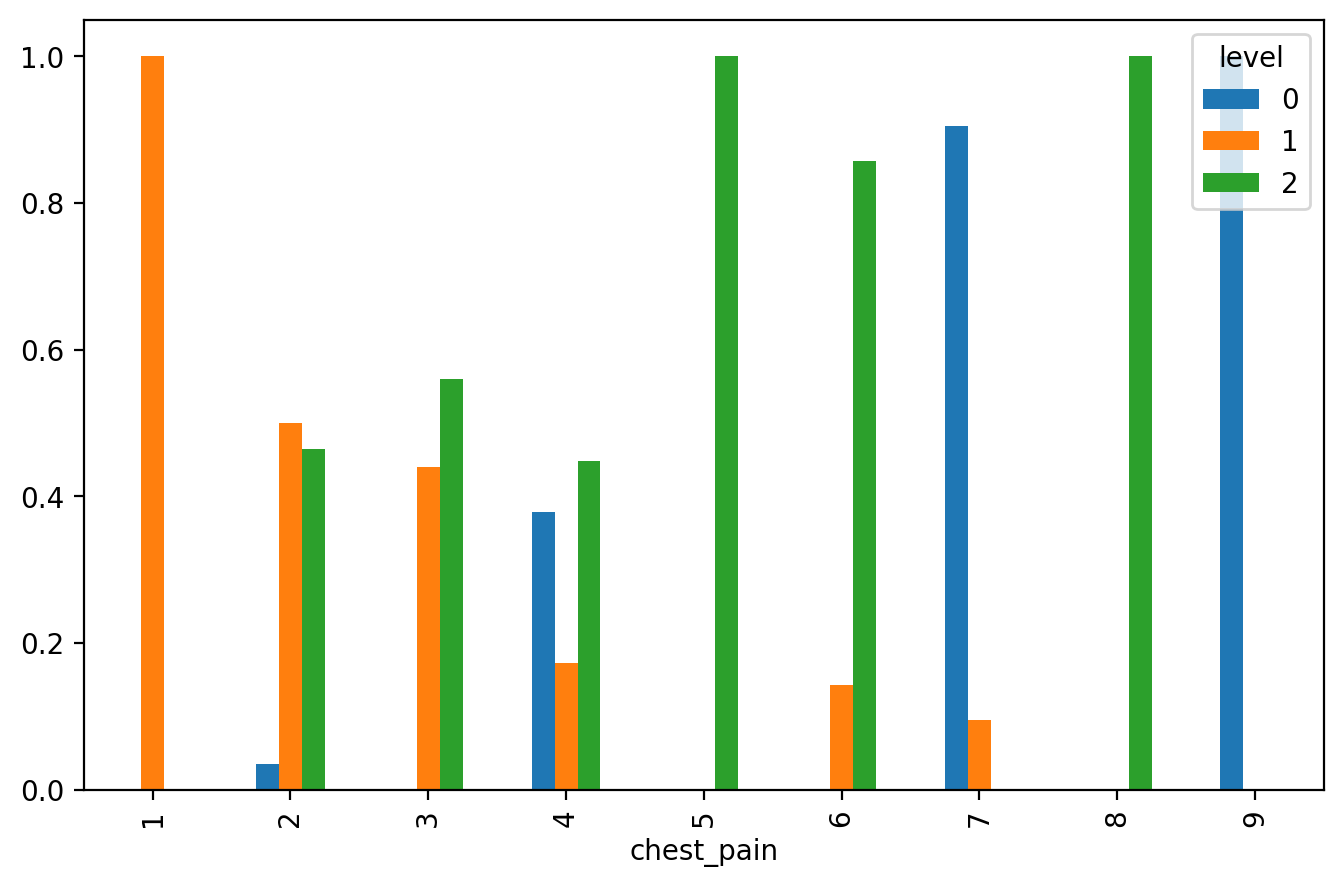

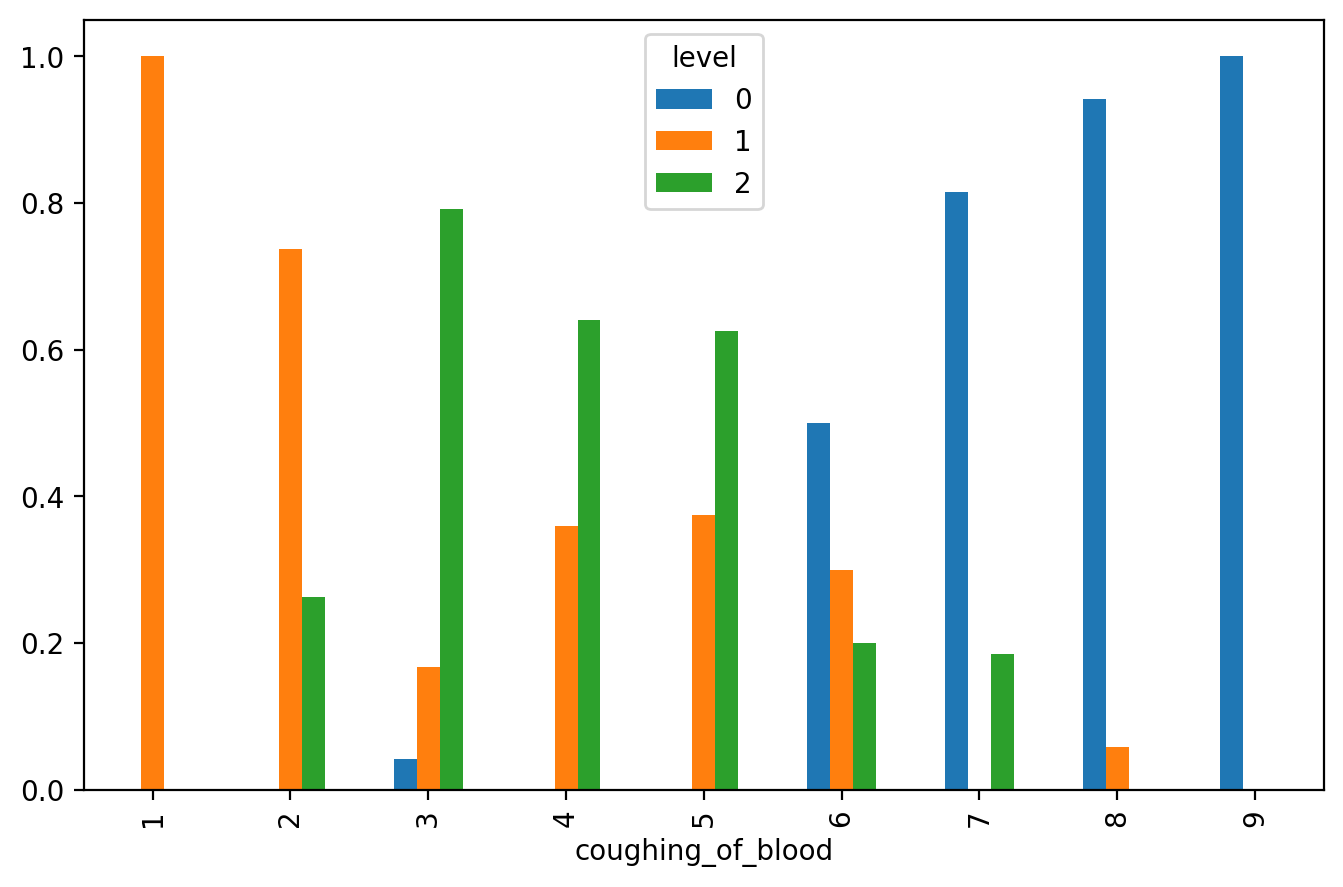

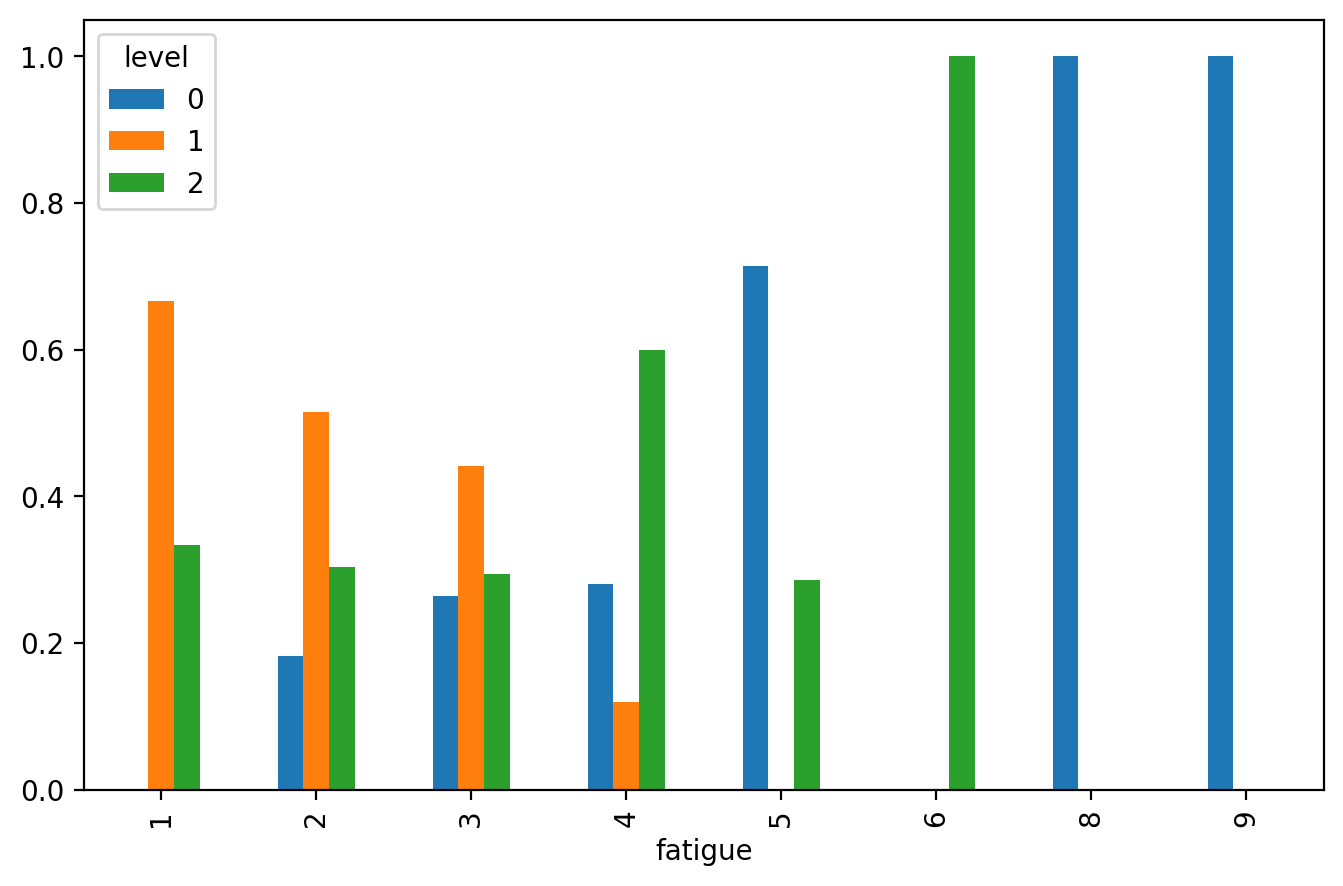

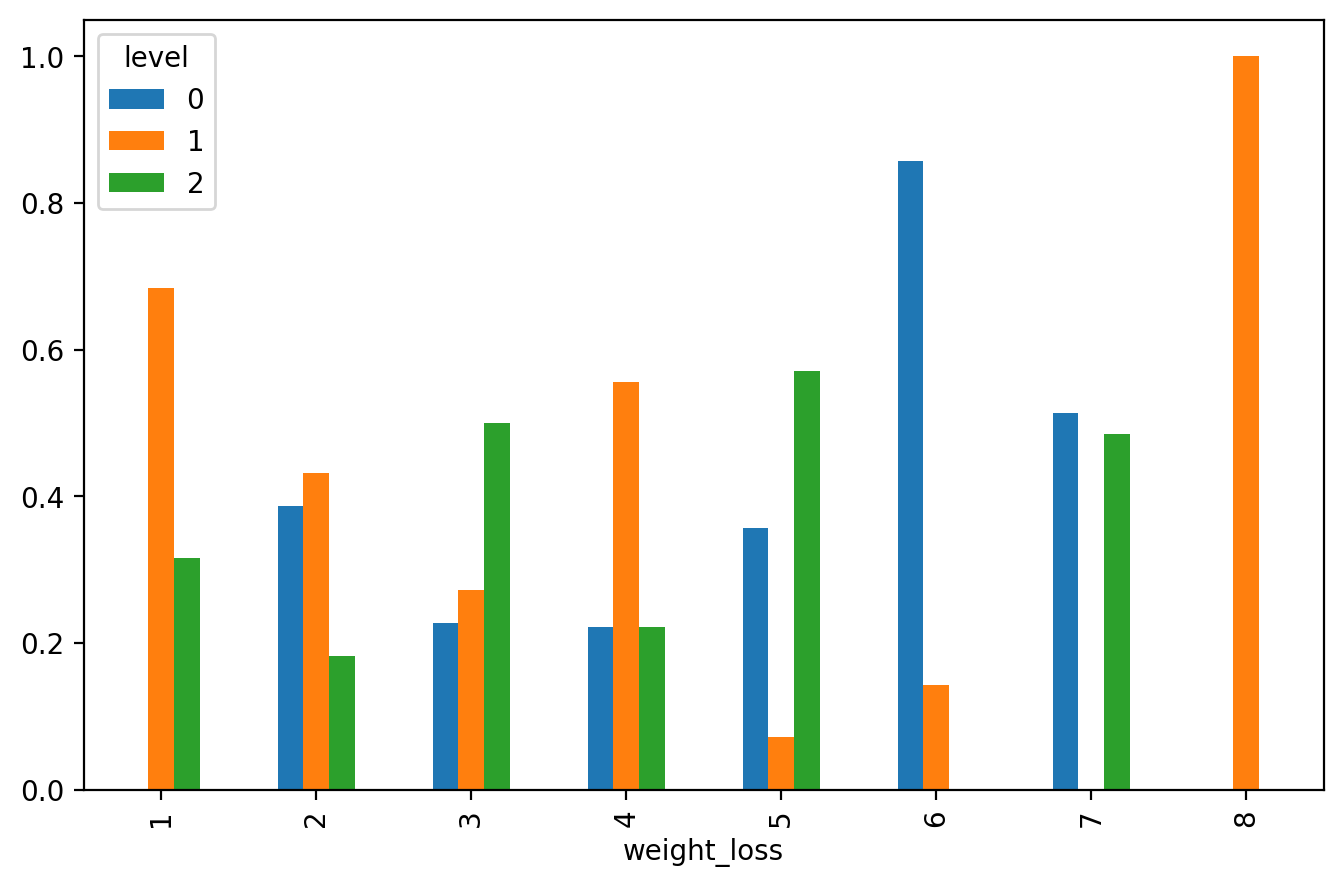

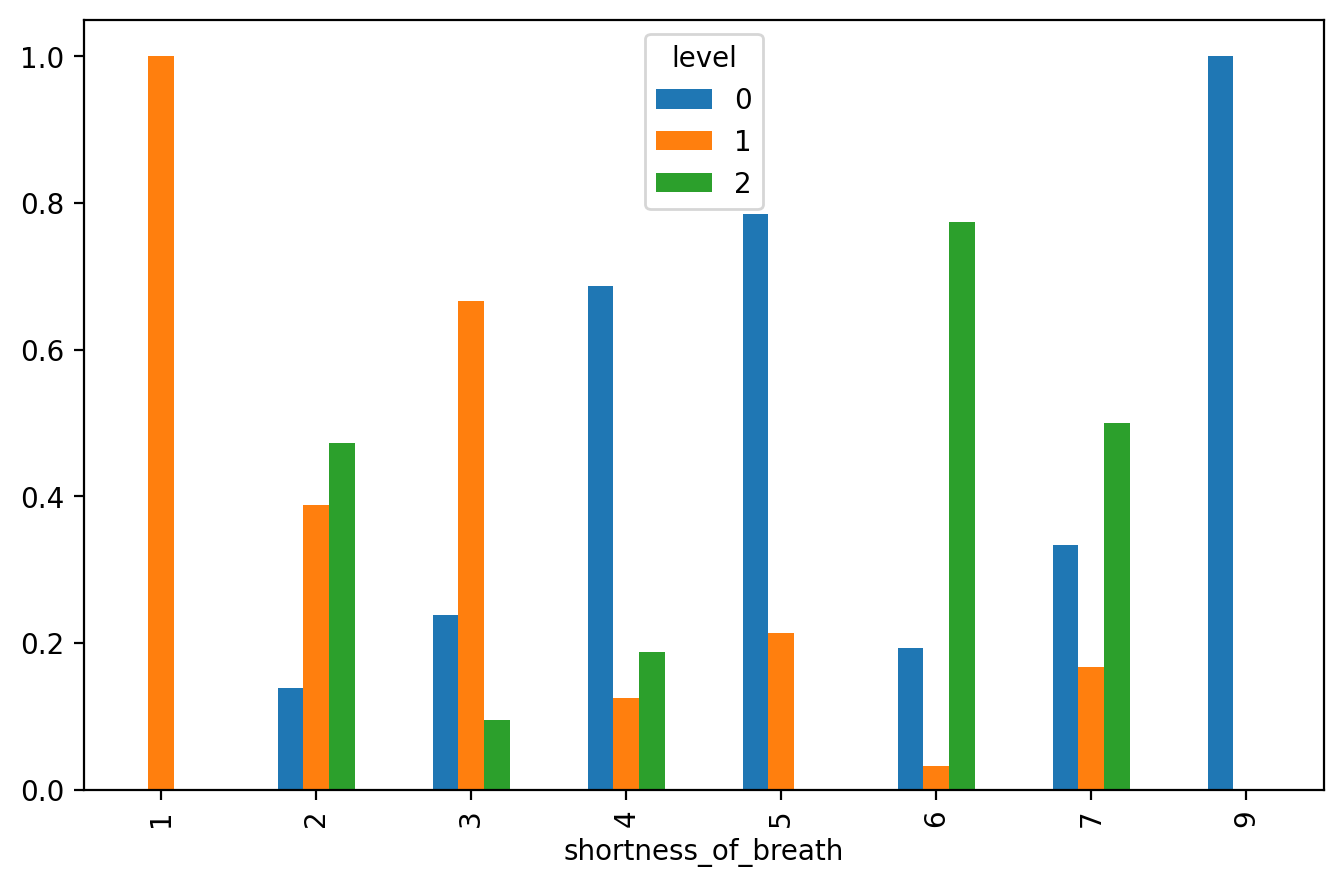

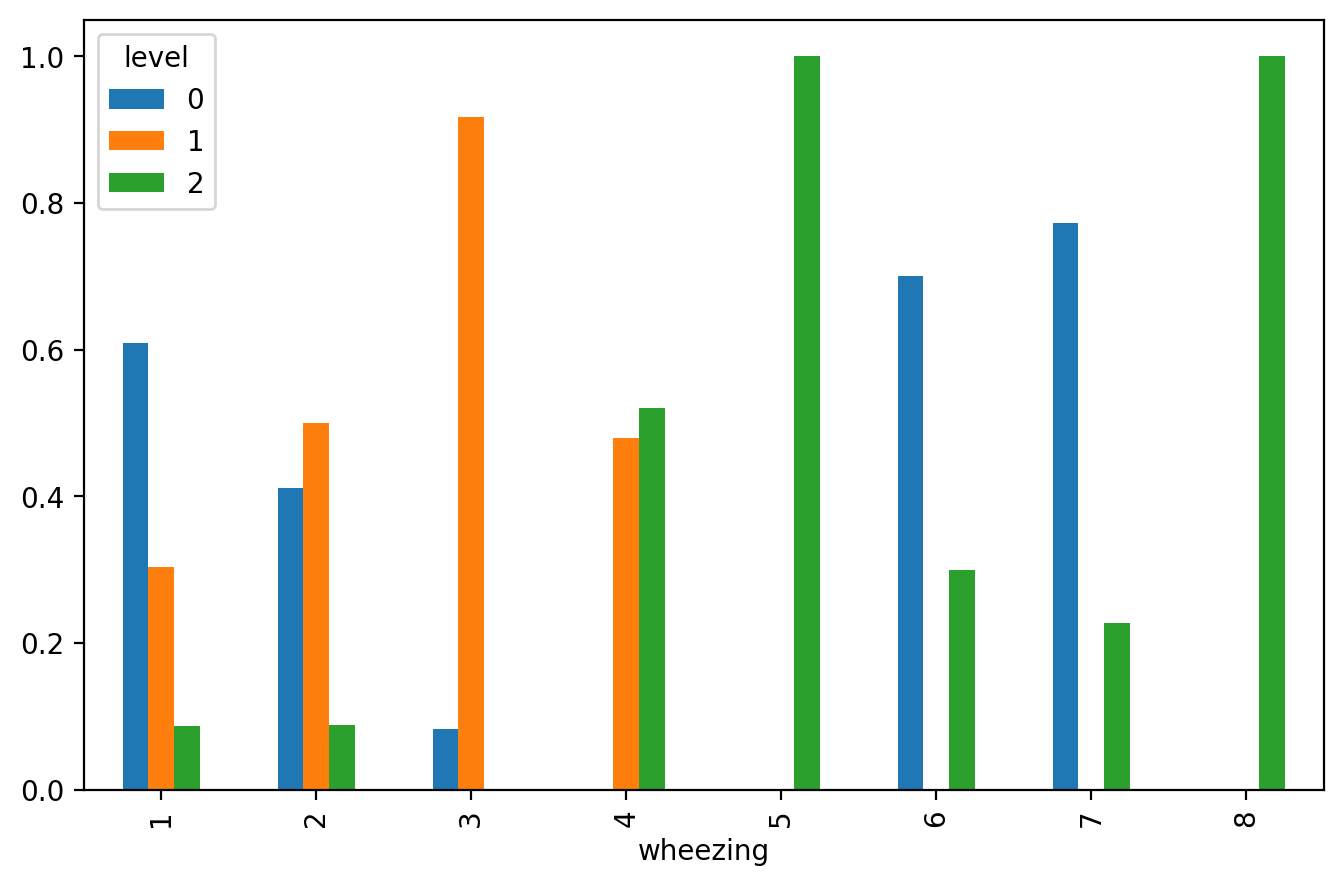

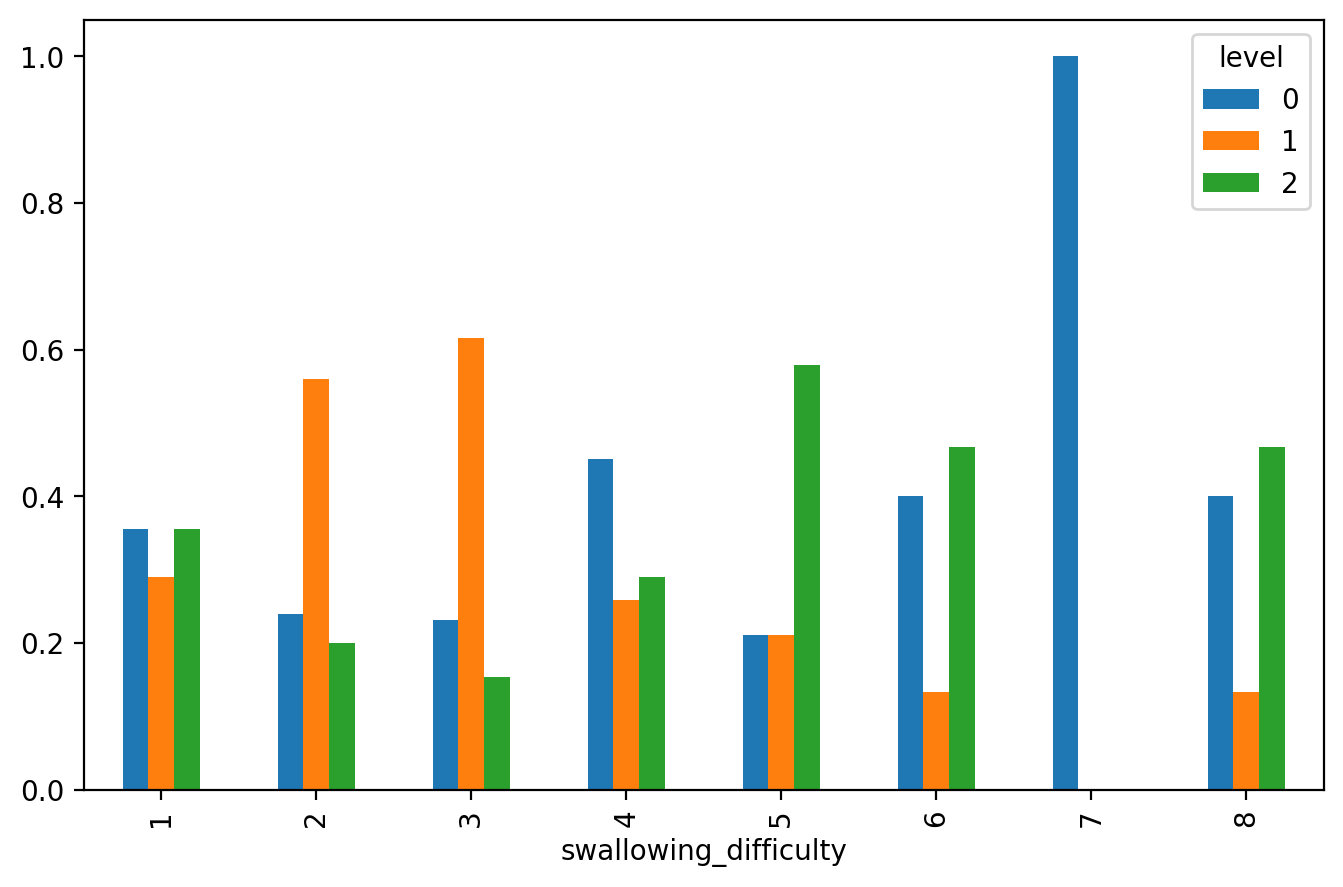

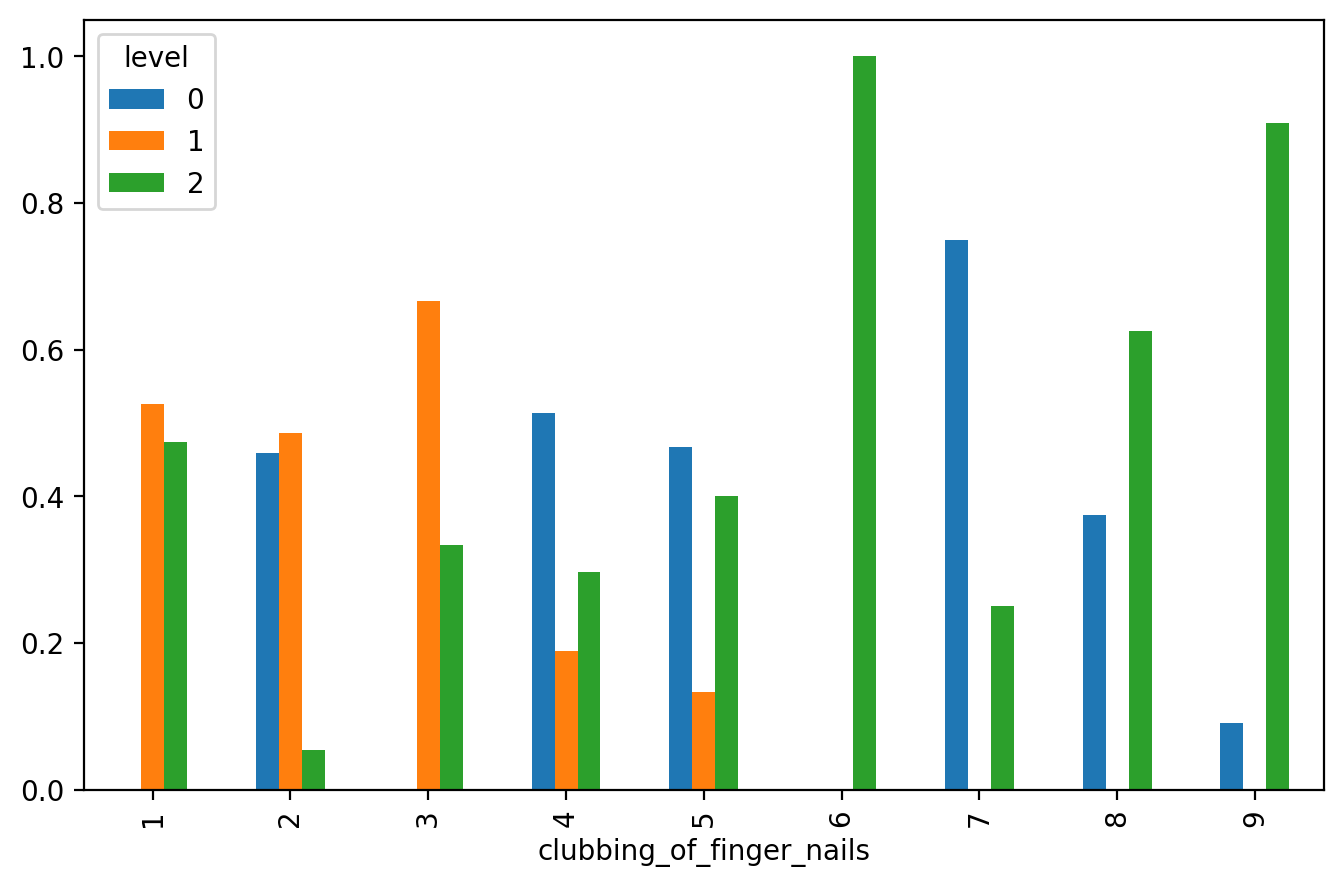

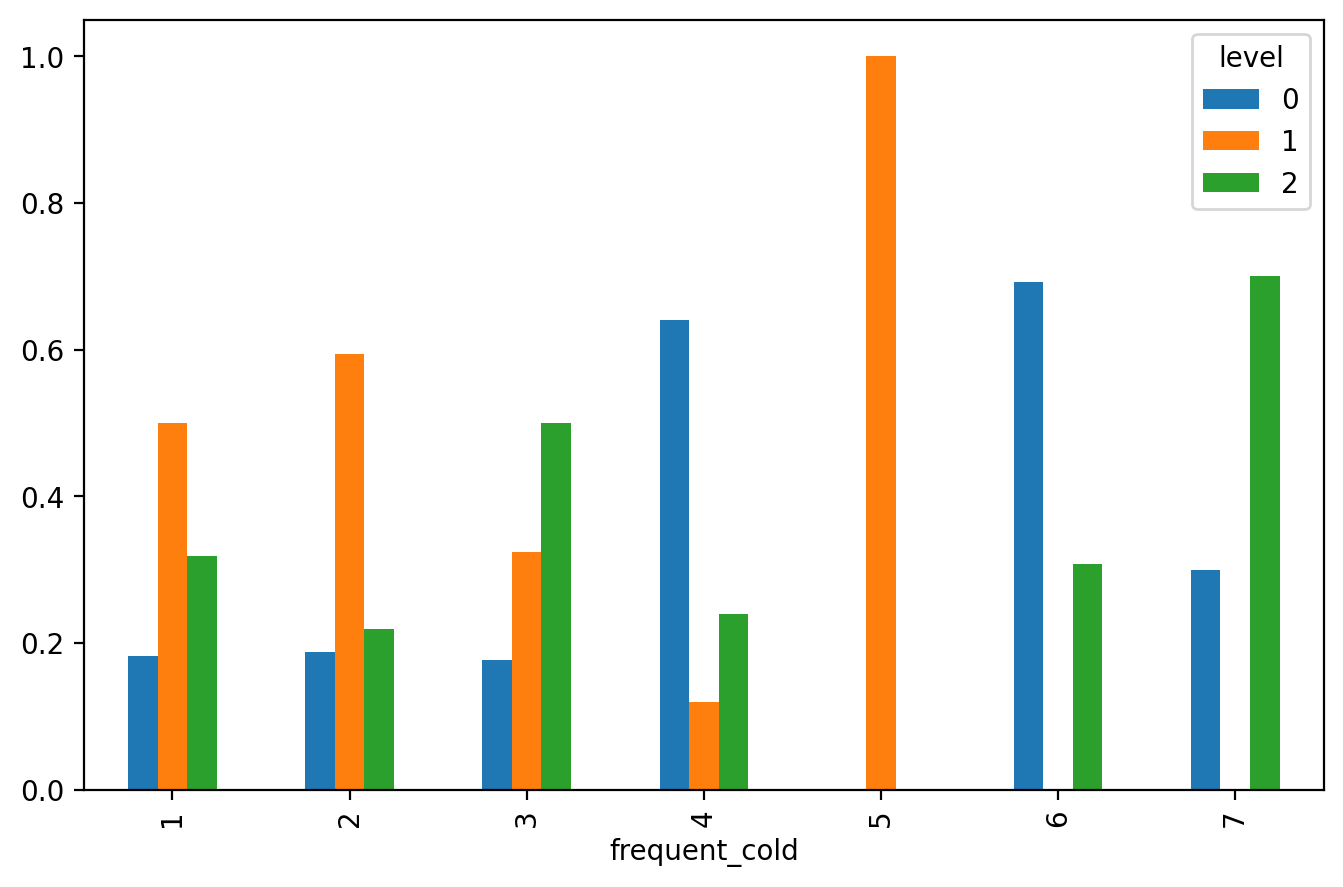

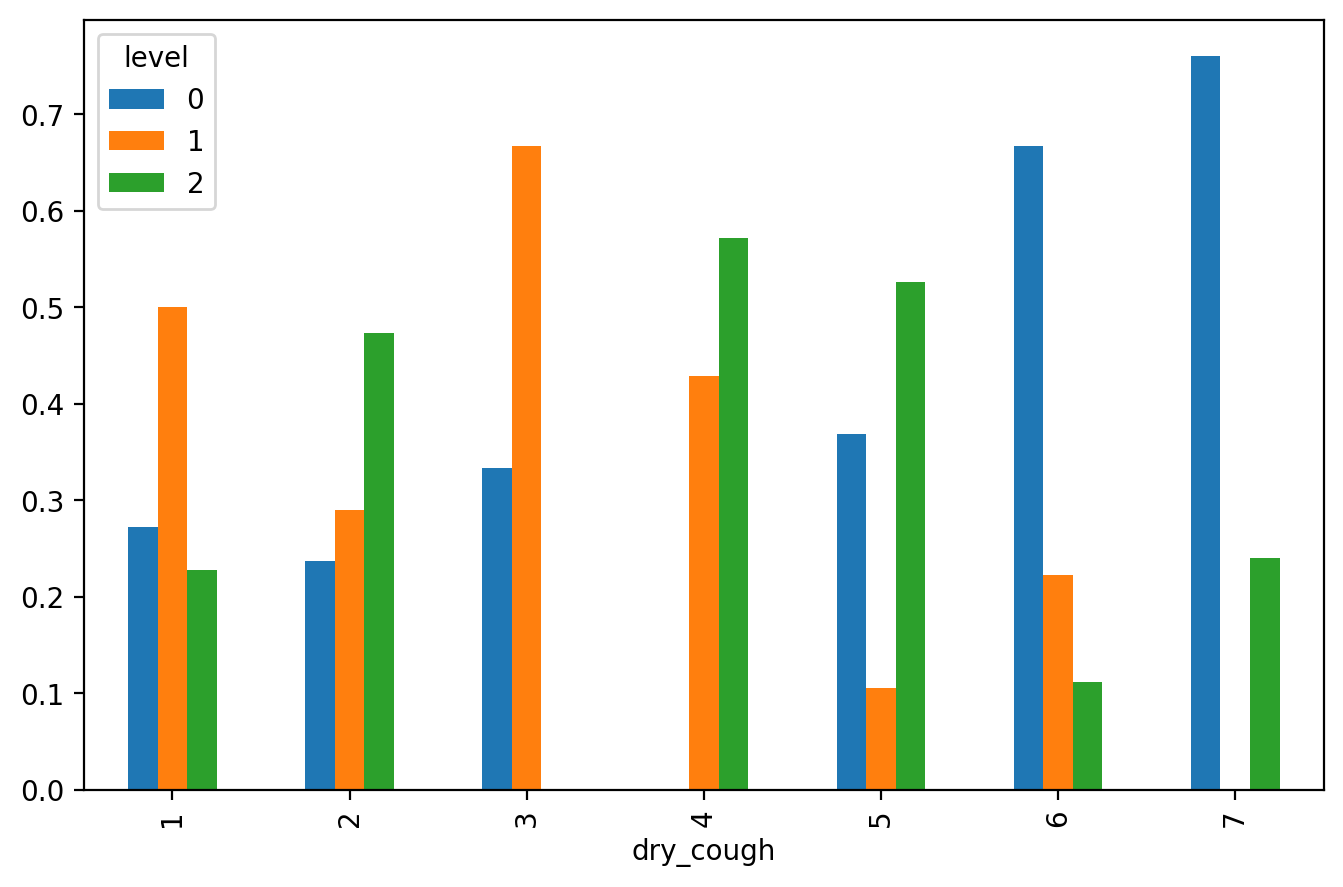

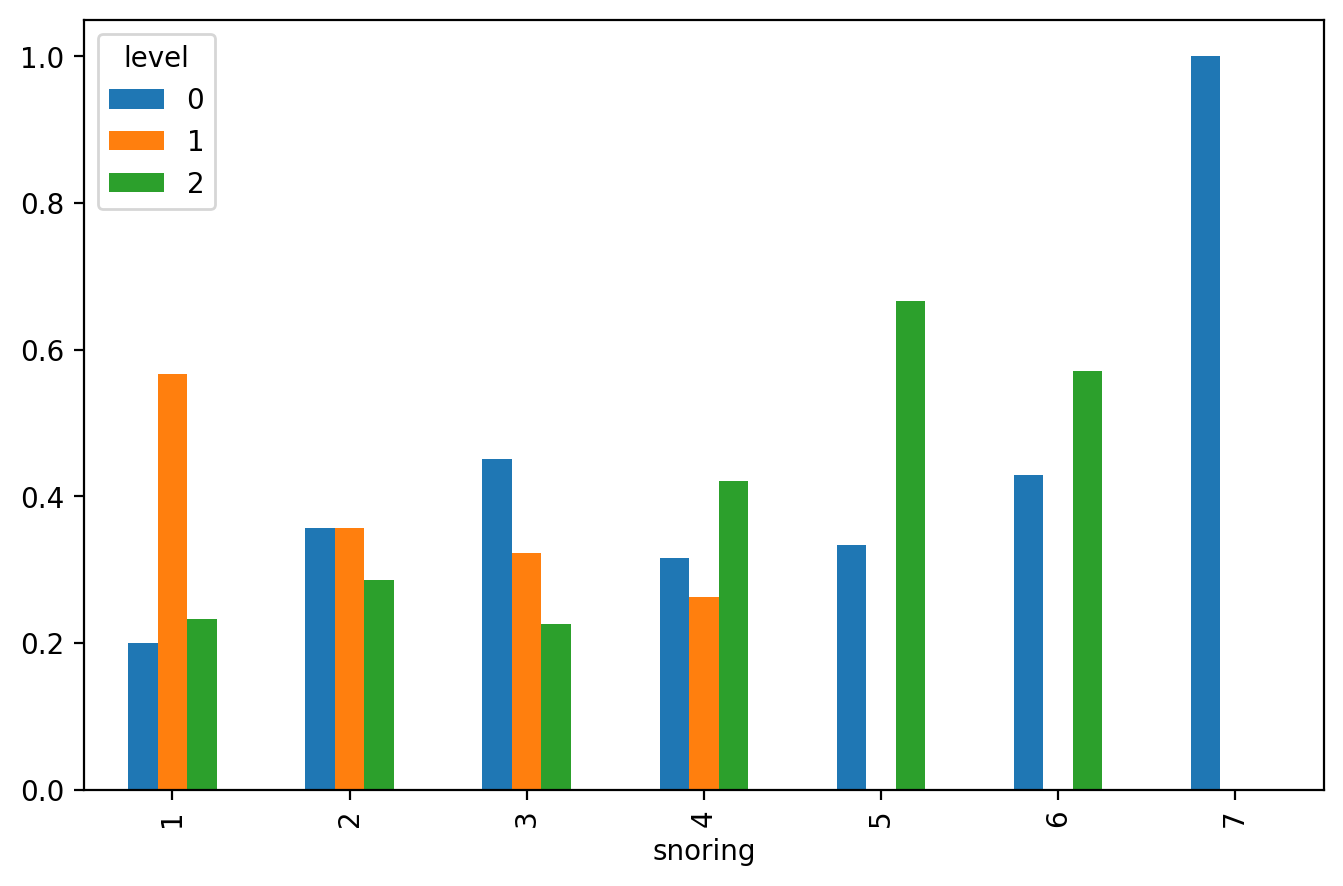

In [59]:
def plot(col, df=df):
    return df.groupby(col)['level'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

for i, col in enumerate(df.columns):
    plot(col)
    


In [60]:
df_new = df.drop(columns=['age','gender']) # no visual correlation between cancer level and age or gender

le = preprocessing.LabelEncoder()
df['level'] = le.fit_transform(df['level'])
corr = df_new.corr()
display(corr)

air_pollution  alcohol_use  dust_allergy  \
air_pollution                  1.000000     0.736960      0.615913   
alcohol_use                    0.736960     1.000000      0.816946   
dust_allergy                   0.615913     0.816946      1.000000   
occupational_hazards           0.605881     0.869507      0.835541   
genetic_risk                   0.690165     0.876886      0.776458   
chronic_lung_disease           0.623945     0.759732      0.629307   
balanced_diet                  0.496917     0.666956      0.657294   
obesity                        0.585509     0.667210      0.701089   
smoking                        0.465423     0.521694      0.311894   
passive_smoker                 0.590956     0.596059      0.541120   
chest_pain                     0.563719     0.724639      0.633989   
coughing_of_blood              0.583074     0.662990      0.618415   
fatigue                        0.202325     0.230836      0.331880   
weight_loss                    0.288713     0.231882      0.348295   
shortness_of_breath            0.243410     0.432130      0.512364   
wheezing                       0.059803     0.199140      0.300813   
swallowing_difficulty         -0.100218    -0.144582     -0.001859   
clubbing_of_finger_nails       0.241962     0.429550      0.365988   
frequent_cold                  0.140642     0.177573      0.239689   
dry_cough                      0.247631     0.237570      0.314666   
snoring                       -0.052964     0.121772      0.049892   
level                         -0.579296    -0.422881     -0.238774   

                          occupational_hazards  genetic_risk  \
air_pollution                         0.605881      0.690165   
alcohol_use                           0.869507      0.876886   
dust_allergy                          0.835541      0.776458   
occupational_hazards                  1.000000      0.885225   
genetic_risk                          0.885225      1.000000   
chronic_lung_disease                  0.857867      0.850901   
balanced_diet                         0.715622      0.695329   
obesity                               0.736990      0.747868   
smoking                               0.460065      0.516966   
passive_smoker                        0.543224      0.613924   
chest_pain                            0.775778      0.836802   
coughing_of_blood                     0.631757      0.624721   
fatigue                               0.267658      0.229213   
weight_loss                           0.223186      0.328643   
shortness_of_breath                   0.356308      0.450340   
wheezing                              0.179531      0.205595   
swallowing_difficulty                -0.039119     -0.078056   
clubbing_of_finger_nails              0.382604      0.369903   
frequent_cold                         0.081565      0.080987   
dry_cough                             0.195024      0.196722   
snoring                               0.016968     -0.030366   
level                                -0.335955     -0.402004   

                          chronic_lung_disease  balanced_diet   obesity  \
air_pollution                         0.623945       0.496917  0.585509   
alcohol_use                           0.759732       0.666956  0.667210   
dust_allergy                          0.629307       0.657294  0.701089   
occupational_hazards                  0.857867       0.715622  0.736990   
genetic_risk                          0.850901       0.695329  0.747868   
chronic_lung_disease                  1.000000       0.636910  0.625587   
balanced_diet                         0.636910       1.000000  0.722903   
obesity                               0.625587       0.722903  1.000000   
smoking                               0.565174       0.604316  0.433926   
passive_smoker                        0.577883       0.710019  0.660263   
chest_pain                            0.784514       0.796517  0.690168   
coughing_of_blood                     0.58

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
High      248
Medium    233
Low       219
Name: count, dtype: int64


In [67]:
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

In [70]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    
    scores = []
    
    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Testing Accuracy')
    plt.grid(alpha=0.1)
    plt.show()
        

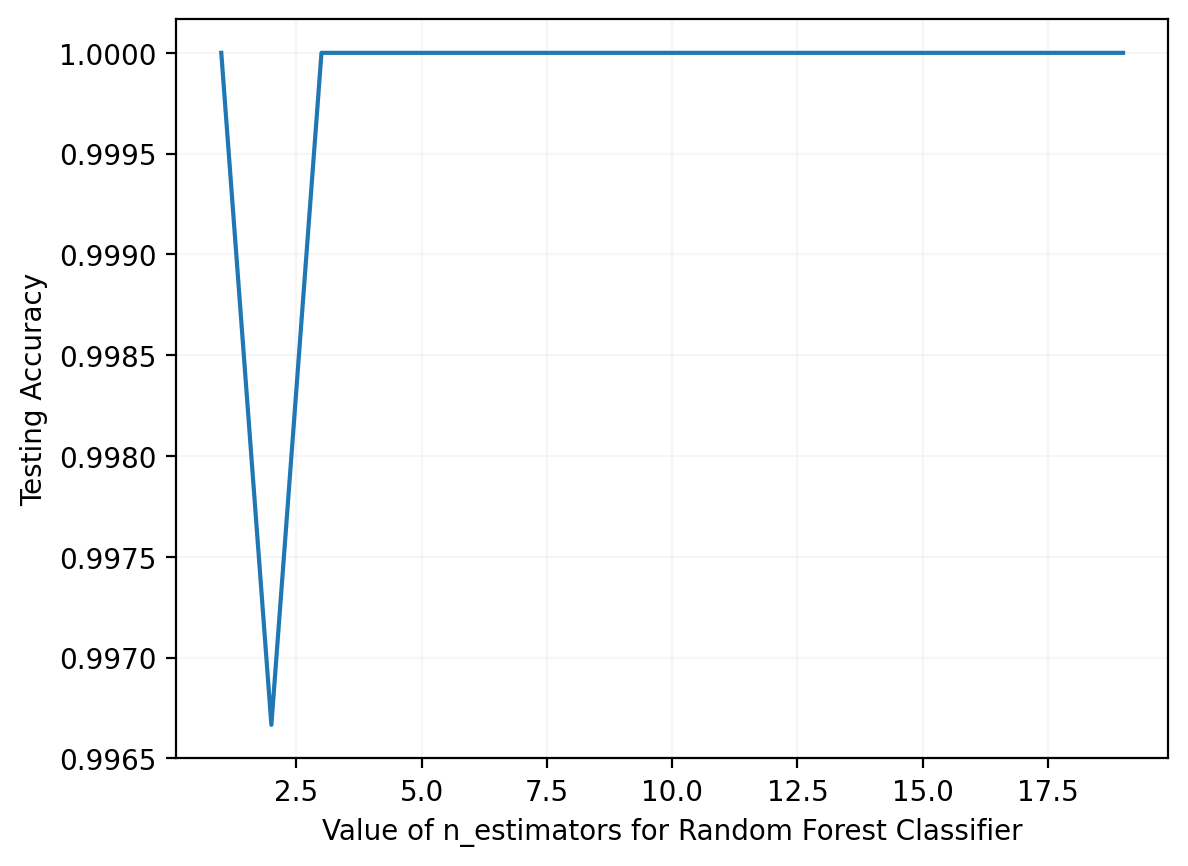

In [71]:
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

In [72]:
# Define model and set random_state
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting model
RF.fit(X_train, y_train)

# predicting with model
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

High      117
Medium     99
Low        84
Name: count, dtype: int64

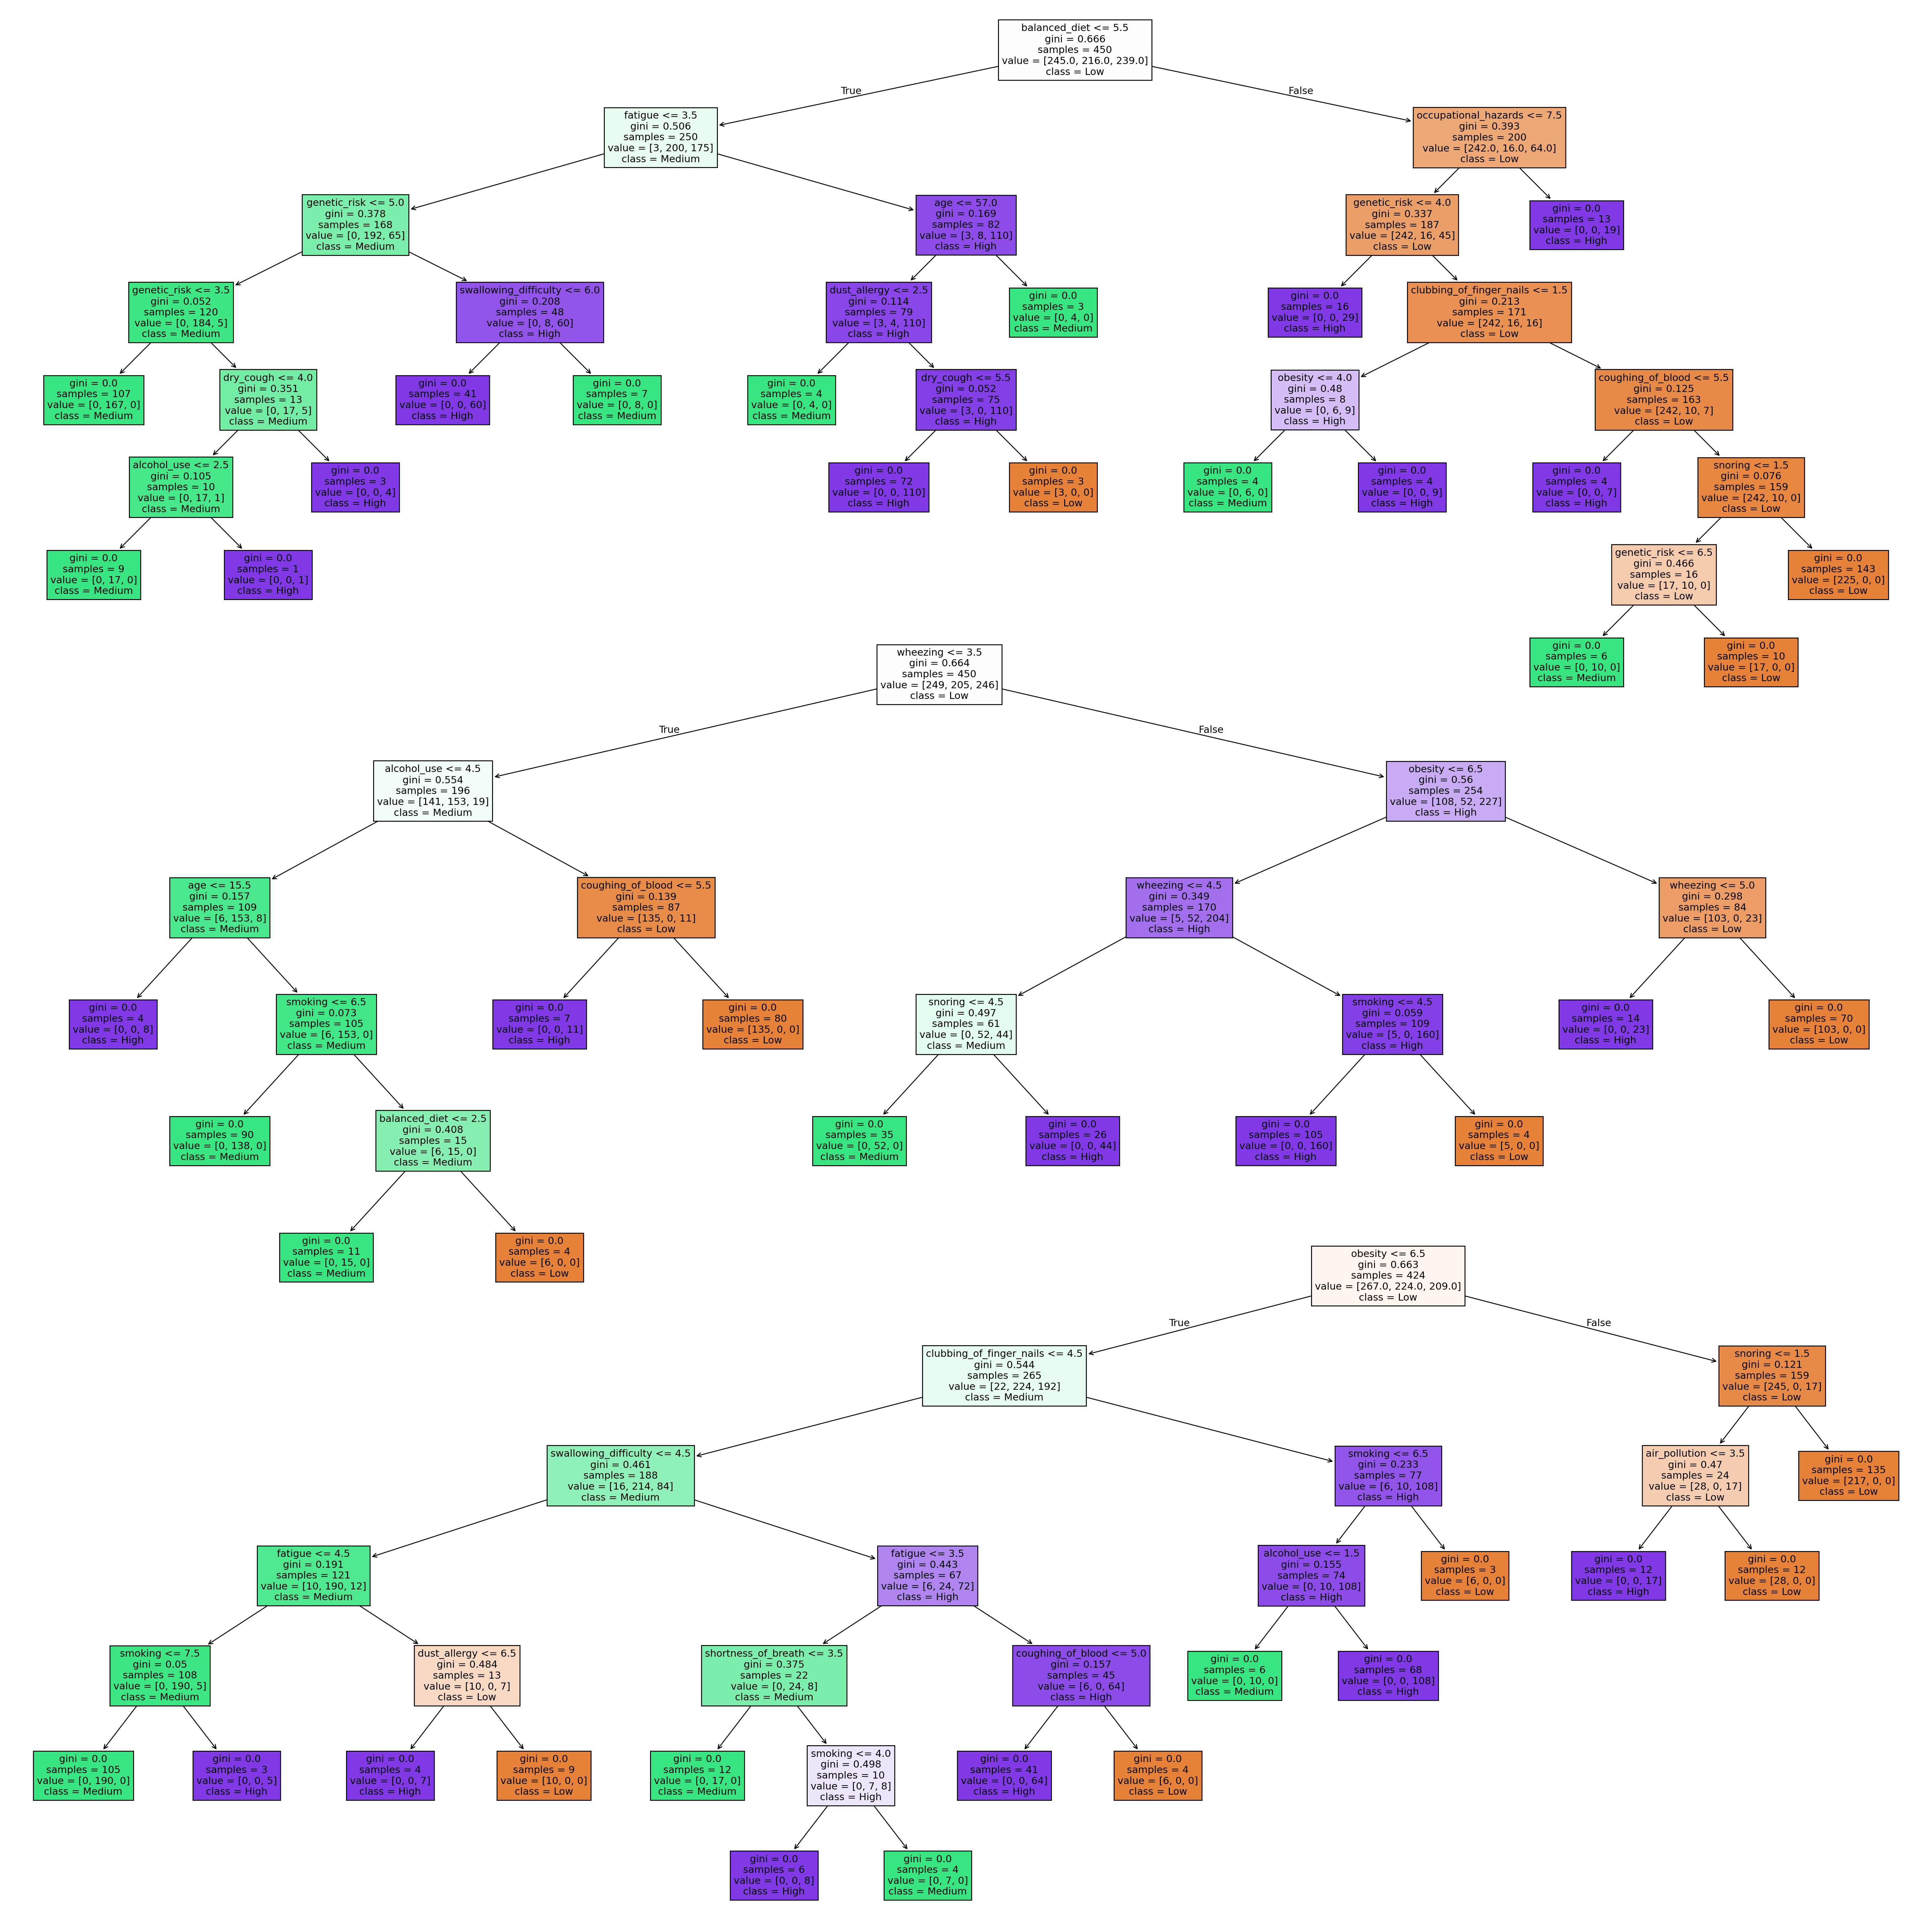

In [73]:
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)
    
plt.tight_layout(h_pad=-10)
plt.show()

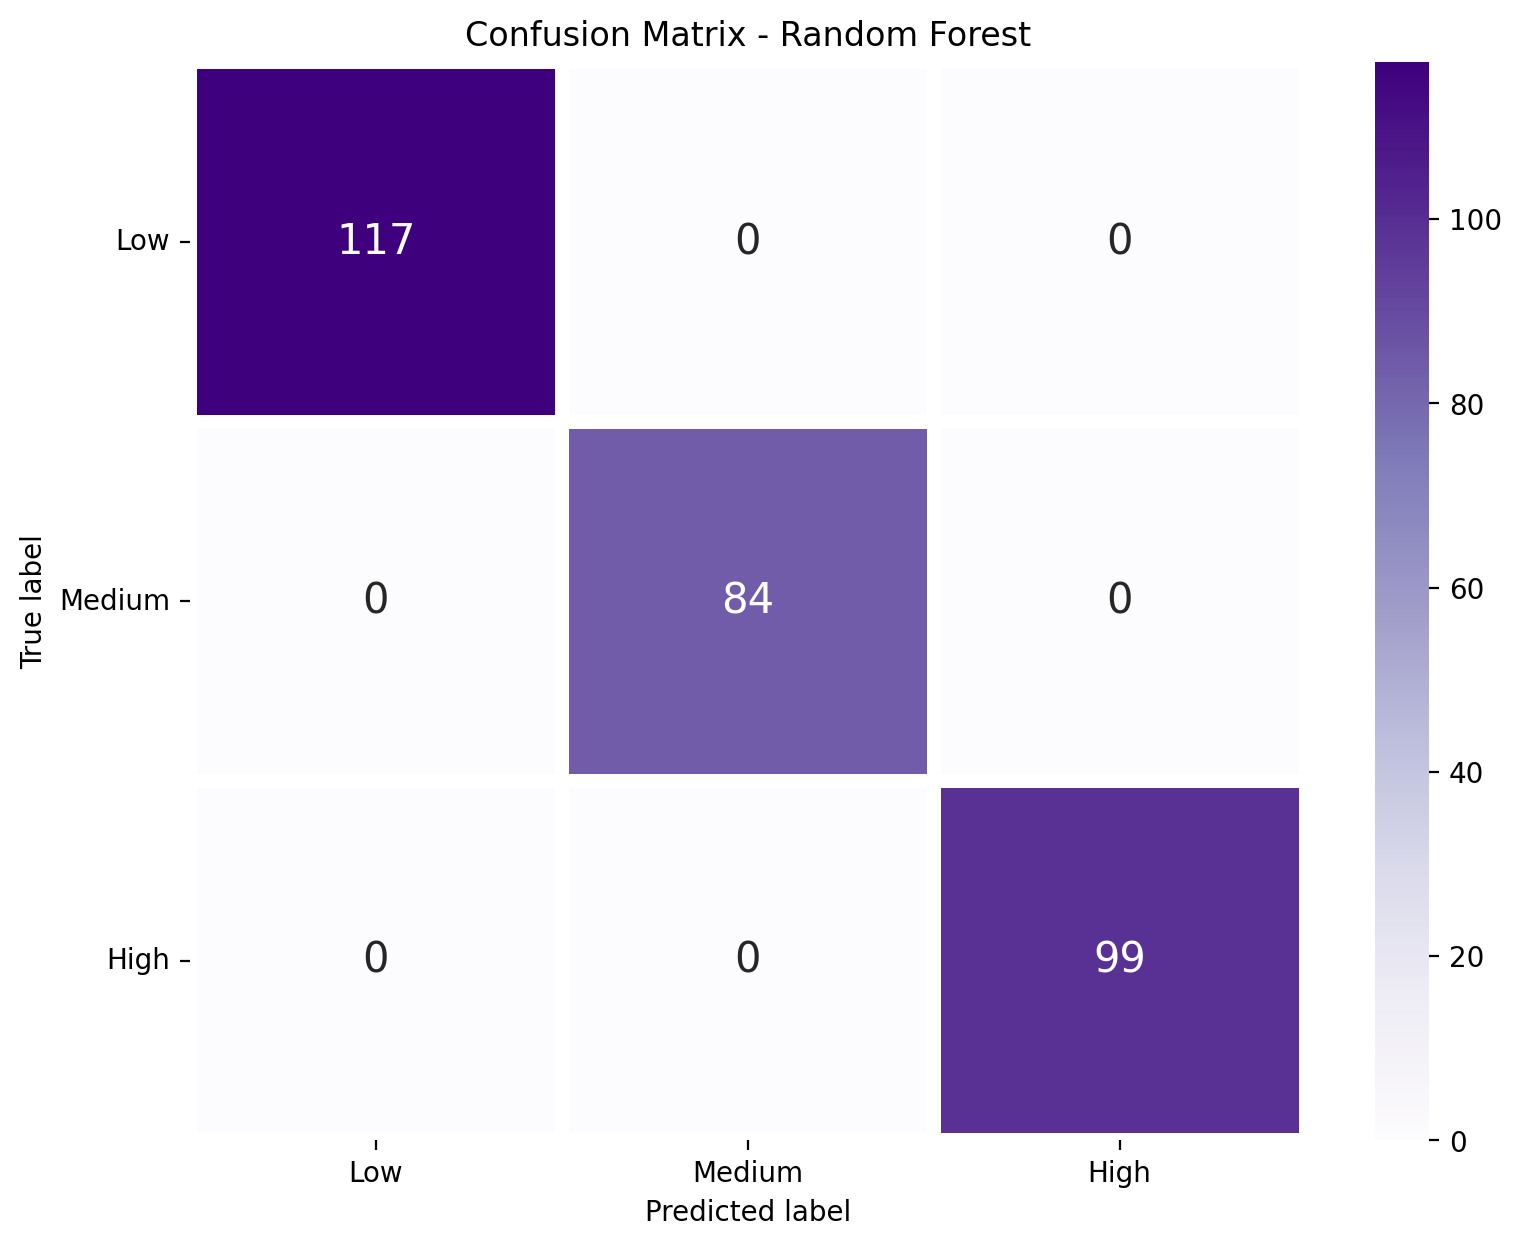

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       117
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [74]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

# Classification report for test data and predictions
ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))